In [1]:
from Simul import get_RQ_MOA4,get_RQ_MOA5,get_RQ_MOA2,get_R_simul_wfT
import numpy as np
import matplotlib.pyplot as plt

# SIMULATION

## Initial condition

In [2]:
# 시뮬레이션에 사용되는 파라미터
alpha = np.pi/3
beta = 0.3
eta1 = 0.2
eta2 = 0.00
shift = 0

## initial condition visualization

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


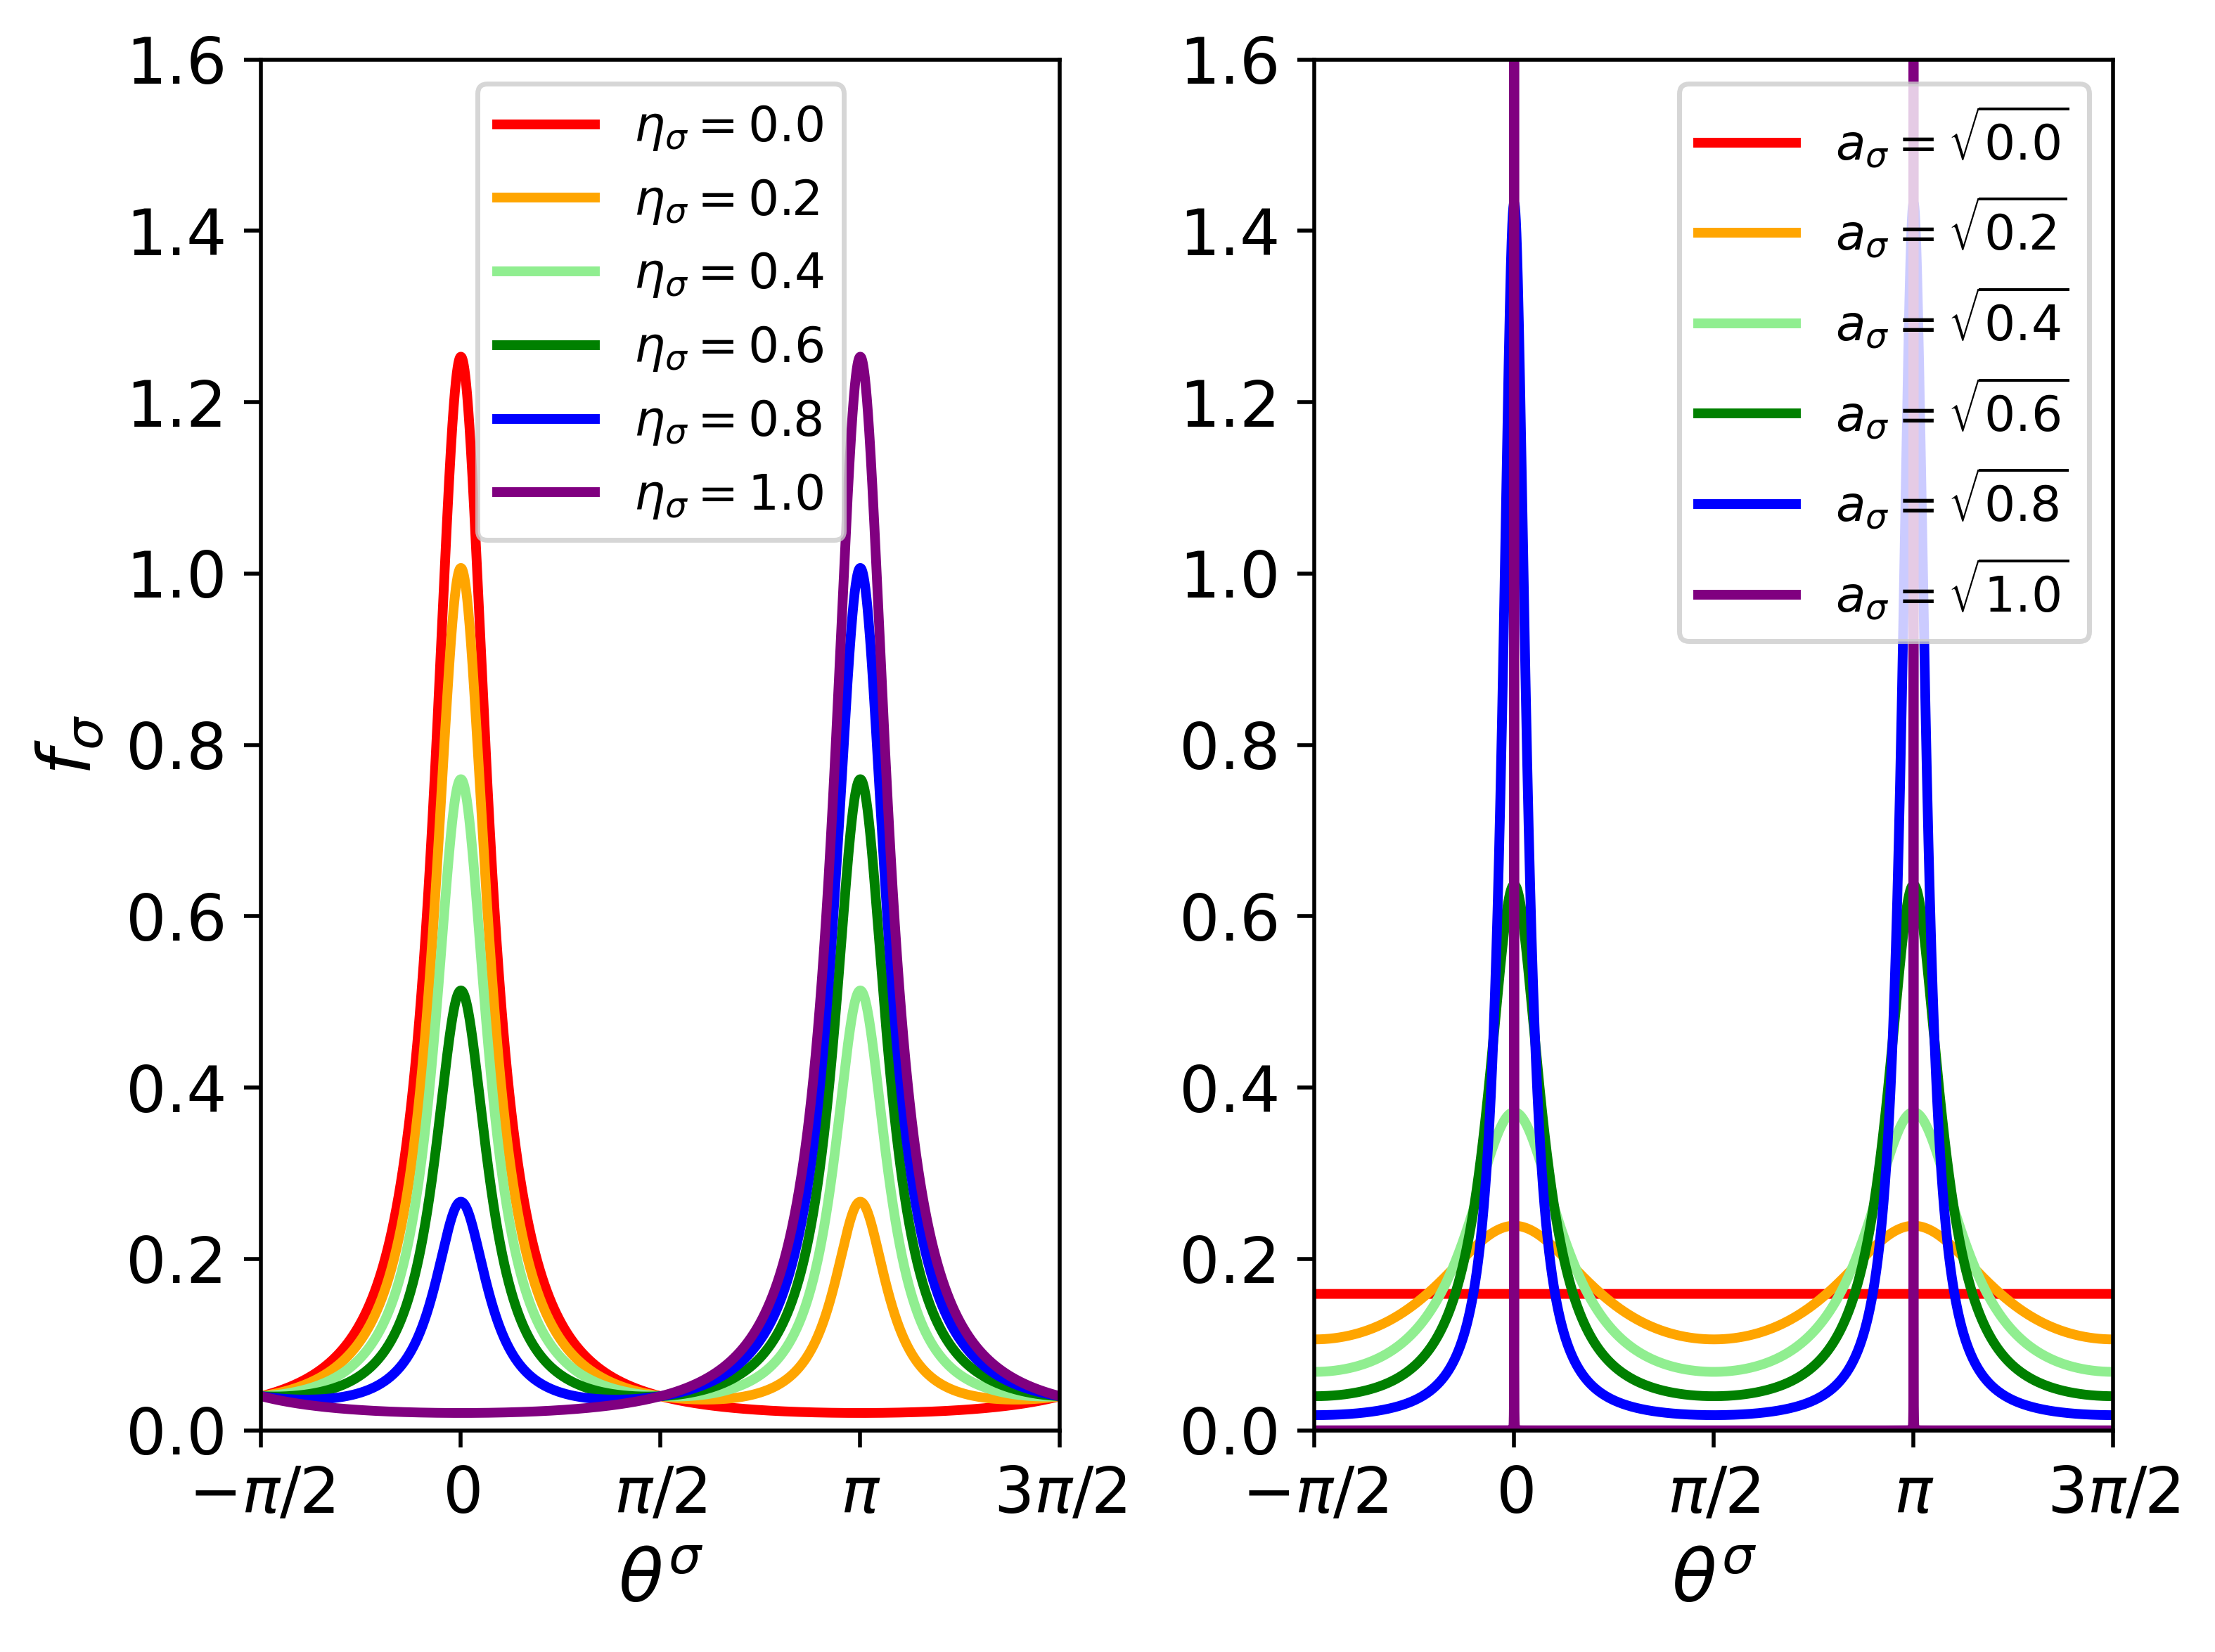

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def dist_ab(x, a, b, eta):
    a_ = a*np.exp(1j*x)/(1-a*np.exp(1j*x))
    b_ = b*np.exp(1j*x)/(1-b*np.exp(1j*x))
    f1 = 1/(2*np.pi) * (1+ (a_+a_.conjugate()))
    f2 = 1/(2*np.pi) * (1+ (b_+b_.conjugate()))
    f = eta *f1+ (1-eta) *f2
    return np.real(f)


def dist_a(x, a, eta):
    f = 1/(np.pi) * (1-a**2 * np.cos(2*x)+(1-2*eta)*a*(1-a**2)*np.cos(x)) / (1-2*a**2*np.cos(2*x)+a**4) - 1/(2*np.pi)
    return f
x = np.linspace(-np.pi/2, 3*np.pi/2, 10000)
xs_ = np.linspace(-np.pi/2, 3*np.pi/2, 5)
A2 = np.sqrt(0.6)
a2 =  A2*np.exp(0*1j)
b2 =  a2* np.exp(np.pi*1j)
xs_
# f = dist_ab(x,a2,b2,eta=0.1)
# f2 = dist_a(x,a2,eta=0.1)
# plt.plot(x,f)
plt.figure(dpi=500)
ax  = plt.subplot(121)
color = ['red','orange','lightgreen','green','blue','purple']
for i in range(6):
    plt.plot(x,dist_a(x,a2,eta=0.2*i),color = color[i],lw=2,label=rf'$\eta_\sigma = {0.2*i:.01f}$')
plt.xlim(-np.pi/2,3*np.pi/2)
plt.legend()
plt.ylim(0,)
plt.yticks(fontsize=13)
plt.xticks([*xs_],[r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$'],fontsize=13)
plt.ylabel(r'$f_\sigma$',fontsize=15)
plt.xlabel(r'$\theta^\sigma$',fontsize=15)

plt.subplot(122)
color = ['red','orange','lightgreen','green','blue','purple']
for i in range(6):
    A2 = np.sqrt(0.2*i)
    a2 =  A2*np.exp(0*1j)
    plt.plot(x, dist_a(x, a2-1e-6, eta=0.5), color=color[i], lw=2, label=rf'$a_\sigma = \sqrt{{{0.2*i:.01f}}}$')
    A2 = np.sqrt(0.6)
    a2 =  A2*np.exp(0*1j)
plt.xlim(-np.pi/2,3*np.pi/2)
plt.legend()
plt.gca().sharey(ax)

plt.ylim(0,1.6)
plt.yticks(fontsize=13)
plt.xticks([*xs_],[r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$'],fontsize=13)
# plt.ylabel(r'$f_\sigma$',fontsize=15)
plt.xlabel(r'$\theta^\sigma$',fontsize=15)
plt.tight_layout()

### OA ANSATZ

In [6]:
# 시뮬레이션 시간 설정
t_end = 1000
# Community 2의 초기 Daido parameter 설정
Q_init = 0.6
# Community 1의 초기 Daido parameter = 1

# OA ansatz
R1_5,R2_5,Q1_5,Q2_5,t = get_RQ_MOA5(1,Q_init,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end,dt=0.1)
# R1_4,R2_4,Q1_4,Q2_4,t = get_RQ_MOA4(1,Q_init,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end,dt=0.1)
# R1_2,R2_2,Q1_2,Q2_2,t = get_RQ_MOA2(1,Q_init,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end,dt=0.1)


### SIMULATION with System size N

In [9]:
N = 5000
R1_s_reg,R2_s_reg,Q1_s_reg,Q2_s_reg,t,thetas_reg = get_R_simul_wfT(1.,Q_init,N,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end,dt=0.1,seed=None)

# Visualization

## Comparision with simulation and OA ansatz for $Q$

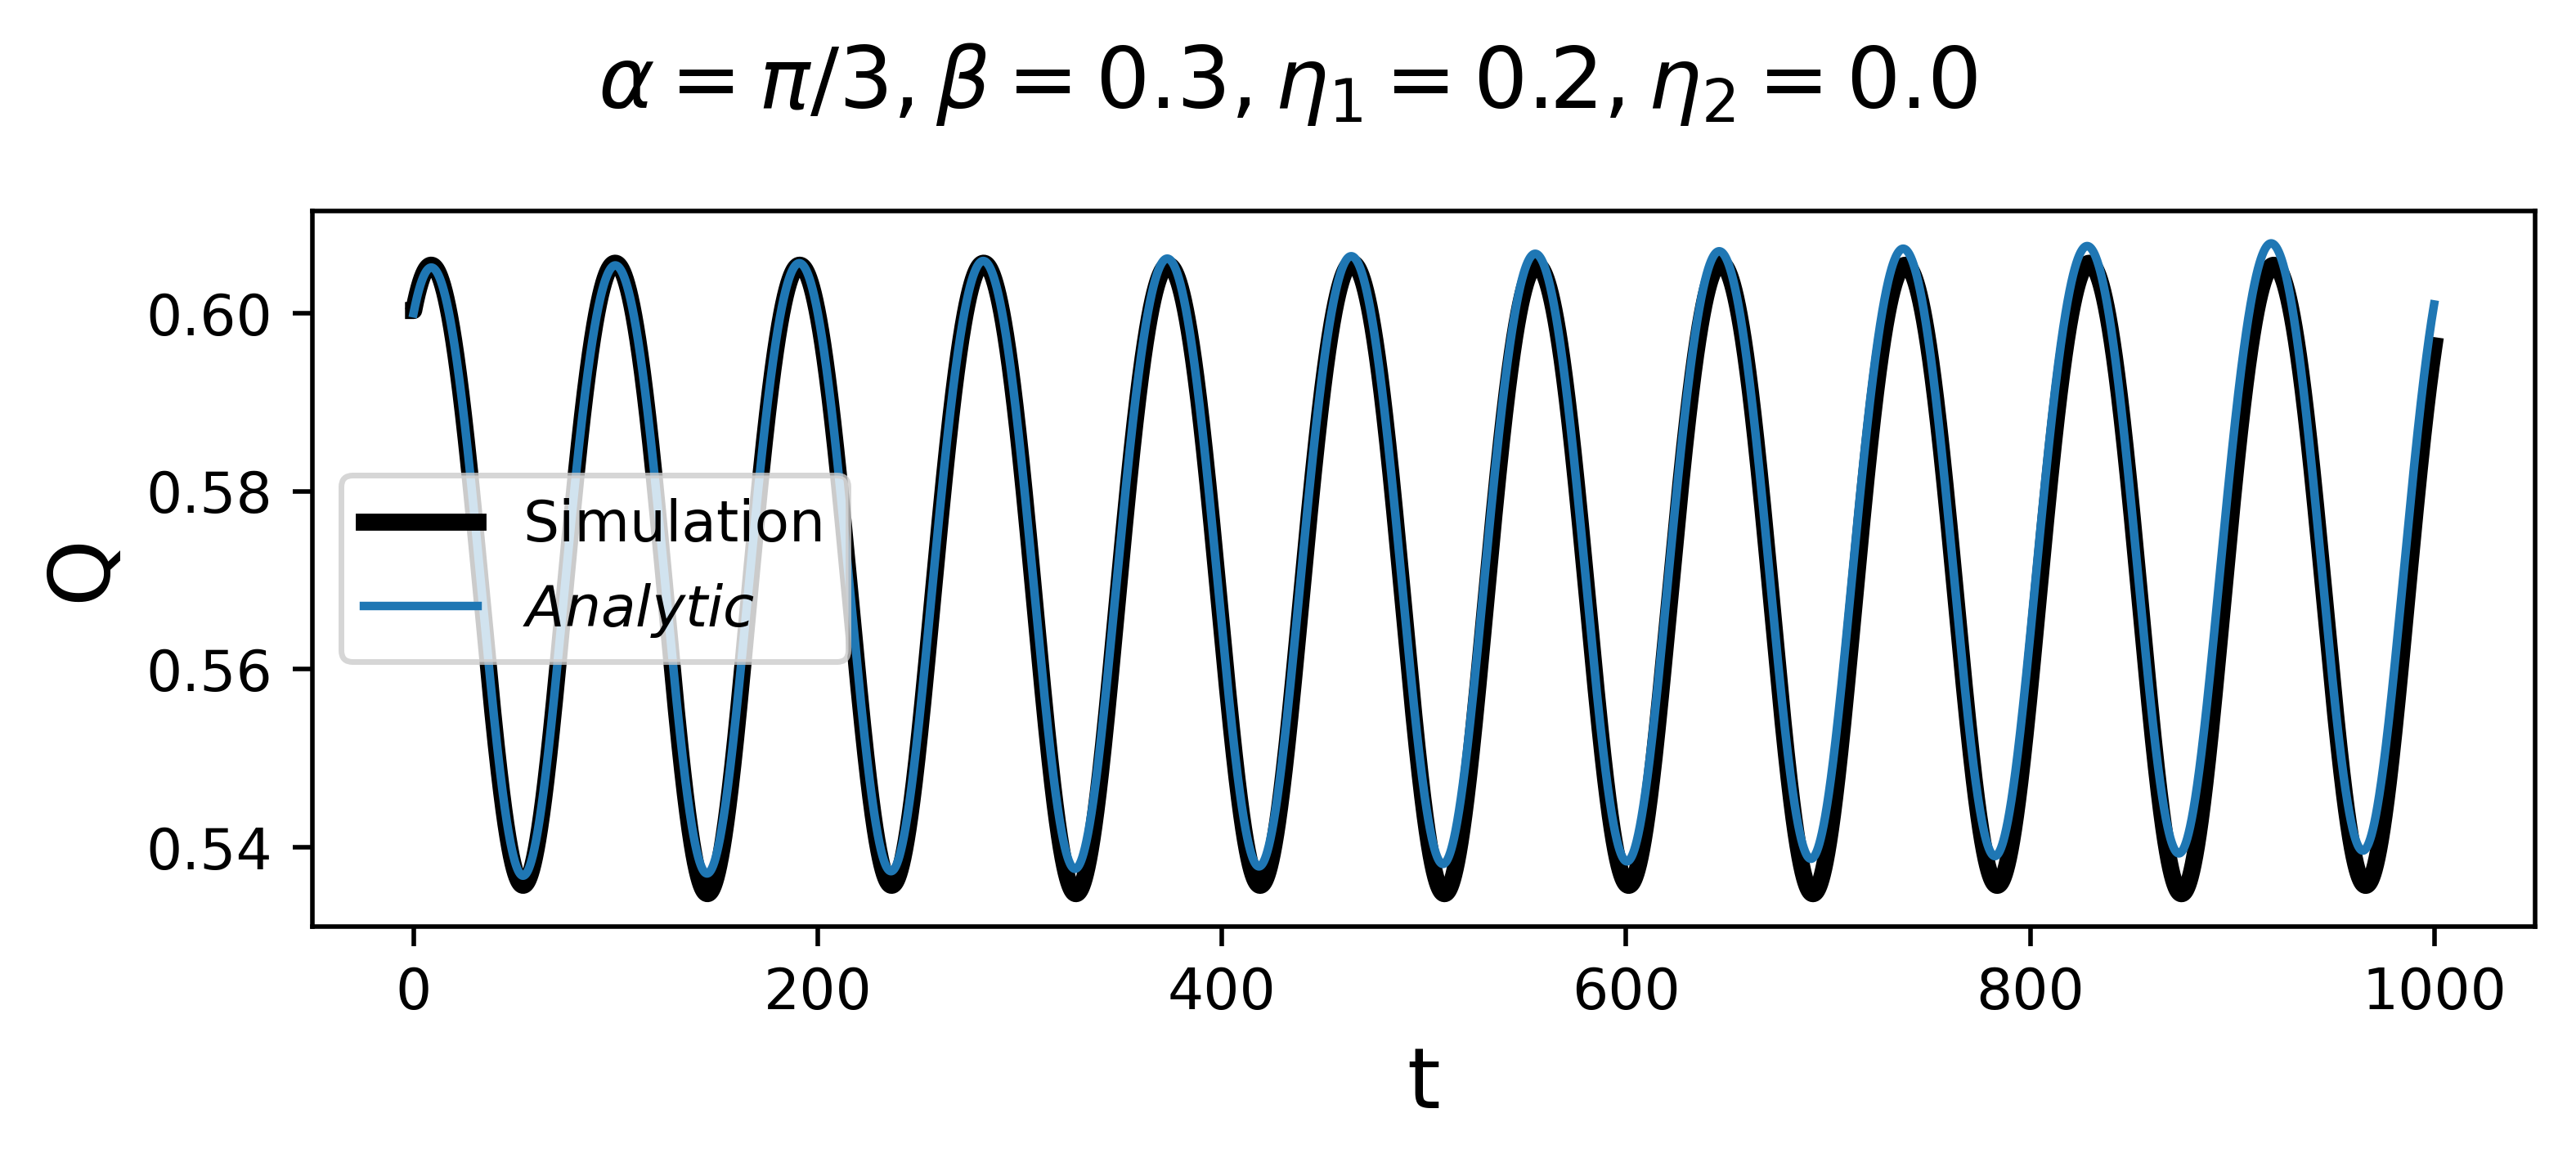

In [ ]:
plt.figure(dpi=500)

plt.subplot(211)
plt.plot(t,Q2_s_reg,label='Simulation',color='black',lw=3,zorder=0)
plt.plot(t,Q2_5,label=rf'$Analytic$')

plt.legend()
plt.ylabel('Q',fontsize=15)
plt.xlabel('t',fontsize=15)
# for a in nums:
    # plt.plot(t_,Q2_S[a])
plt.suptitle(rf'$\alpha=\pi/3,\beta={beta},\eta_1 = {eta1},\eta_2 = {eta2}$',fontsize=15)
# plt.xlim(0,3000)
# plt.ylim(0.0,1.05)
plt.tight_layout()

## Comparision with simulation and OA ansatz for $R$

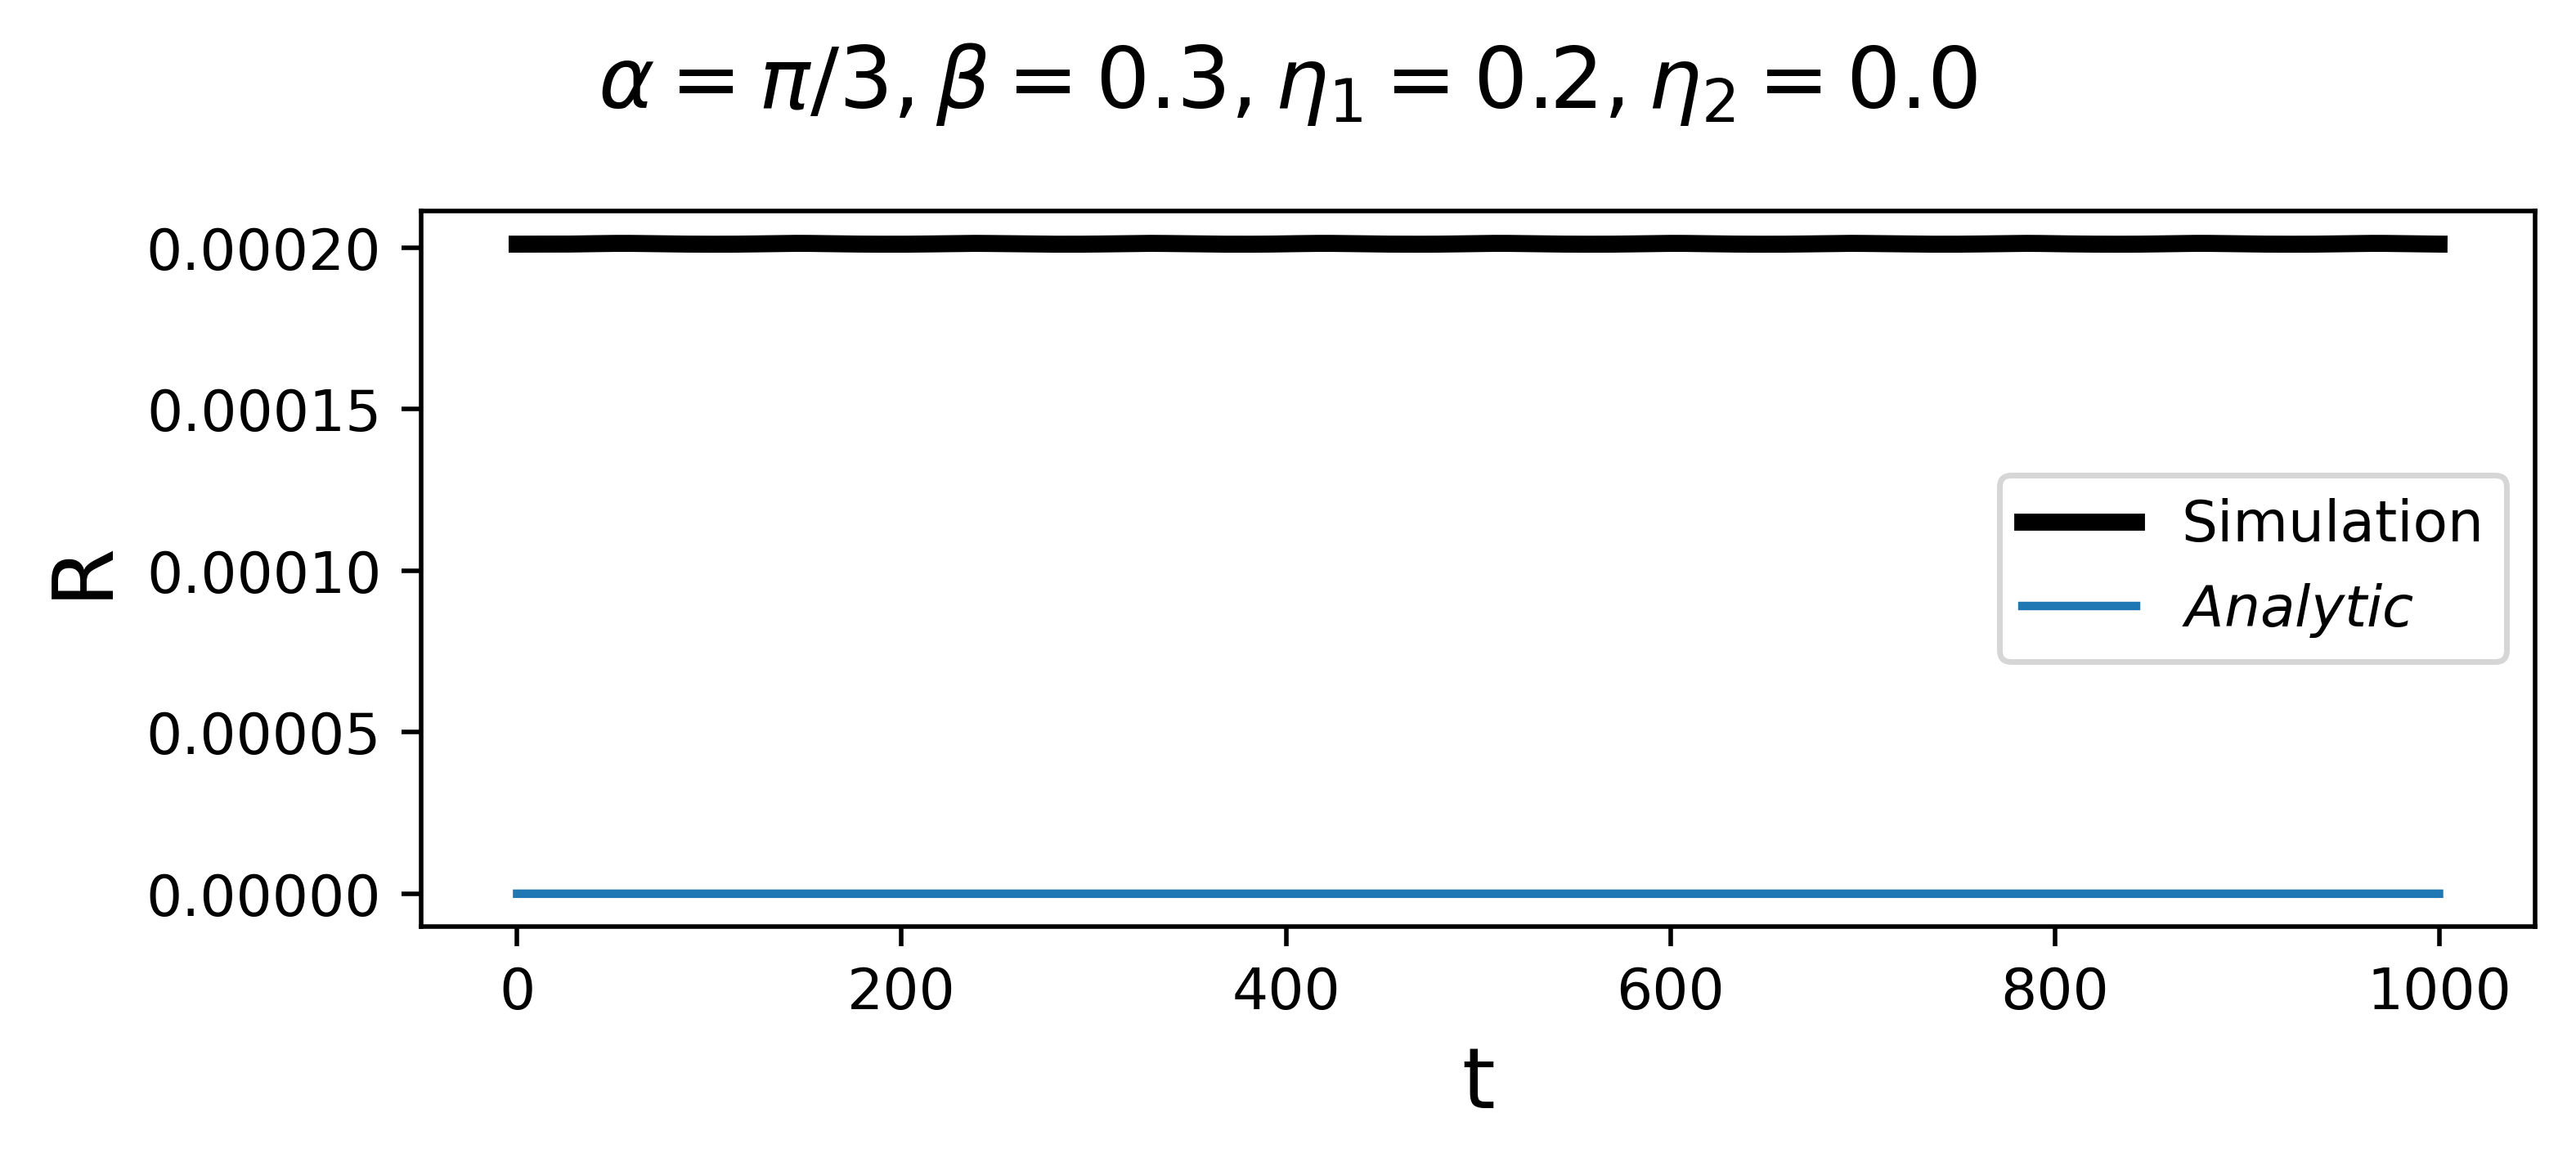

In [14]:
plt.figure(dpi=500)

plt.subplot(211)
plt.plot(t,R2_s_reg,label='Simulation',color='black',lw=3,zorder=0)
plt.plot(t,R2_5,label=rf'$Analytic$')

plt.legend()
plt.ylabel('R',fontsize=15)
plt.xlabel('t',fontsize=15)

plt.suptitle(rf'$\alpha=\pi/3,\beta={beta},\eta_1 = {eta1},\eta_2 = {eta2}$',fontsize=15)
# plt.xlim(0,3000)
# plt.ylim(0.0,1.05)
plt.tight_layout()

# Jacobian

In [5]:
import sympy as sp
mu, alpha = sp.symbols('mu alpha',real=True,positive=True)
r = sp.symbols('r_sigma',real=True,positive=True)
eta1 = sp.symbols('\eta_sigma',real=True,positive=True)
eta2 = sp.symbols('\eta_{\sigma\'}',real=True,positive=True)
phi = sp.symbols('phi',real=True)

In [69]:
eq = mu**2 * sp.sin(2*phi + alpha) - sp.sin(alpha)
dr = sp.Rational(1,2) / r *(1-r**4) * (mu**2*(1-2*eta2)**2 * sp.cos(2*phi + alpha))
dphi = -sp.Rational(1,2) / r**2 *(1+r**4) * (mu**2*(1-2*eta2)**2 * sp.sin(2*phi + alpha)) + ((1-2*eta2)**2 * sp.sin(alpha))
JRR = dr.diff(r)
JRphi = dr.diff(phi)
JphiR = dphi.diff(r)
Jphiphi = dphi.diff(phi)

J = sp.Matrix([[JRR,JRphi],[JphiR,Jphiphi]])
J

Matrix([
[-2*mu**2*r_sigma**2*(1 - 2*\eta_{\sigma'})**2*cos(alpha + 2*phi) - mu**2*(1 - 2*\eta_{\sigma'})**2*(1 - r_sigma**4)*cos(alpha + 2*phi)/(2*r_sigma**2),    -mu**2*(1 - 2*\eta_{\sigma'})**2*(1 - r_sigma**4)*sin(alpha + 2*phi)/r_sigma],
[       -2*mu**2*r_sigma*(1 - 2*\eta_{\sigma'})**2*sin(alpha + 2*phi) + mu**2*(1 - 2*\eta_{\sigma'})**2*(r_sigma**4 + 1)*sin(alpha + 2*phi)/r_sigma**3, -mu**2*(1 - 2*\eta_{\sigma'})**2*(r_sigma**4 + 1)*cos(alpha + 2*phi)/r_sigma**2]])

In [70]:
JphiR

-2*mu**2*r_sigma*(1 - 2*\eta_{\sigma'})**2*sin(alpha + 2*phi) + mu**2*(1 - 2*\eta_{\sigma'})**2*(r_sigma**4 + 1)*sin(alpha + 2*phi)/r_sigma**3

In [50]:
sp.print_latex(sp.simplify(J))

\left[\begin{matrix}\frac{\mu^{2} \left(2 \eta_{\sigma'} - 1\right)^{2} \left(- 3 r_{\sigma}^{4} - 1\right) \cos{\left(\alpha + 2 \phi \right)}}{2 r_{\sigma}^{2}} & \frac{\mu^{2} \left(2 \eta_{\sigma'} - 1\right)^{2} \left(r_{\sigma}^{4} - 1\right) \sin{\left(\alpha + 2 \phi \right)}}{r_{\sigma}}\\\frac{\mu^{2} \left(1 - r_{\sigma}^{4}\right) \left(2 \eta_{\sigma'} - 1\right)^{2} \sin{\left(\alpha + 2 \phi \right)}}{r_{\sigma}^{3}} & - \frac{\mu^{2} \left(2 \eta_{\sigma'} - 1\right)^{2} \left(r_{\sigma}^{4} + 1\right) \cos{\left(\alpha + 2 \phi \right)}}{r_{\sigma}^{2}}\end{matrix}\right]


2 \phi + \alpha 

$$
\left[\begin{matrix}\frac{\mu^{2} \left(1 - 2 \eta_{\sigma'}\right)^{2} \left(- 3 r_{\sigma}^{4} - 1\right) \cos{\left(2 \phi + \alpha  \right)}}{2 r_{\sigma}^{2}} & \frac{\mu^{2} \left(1 - 2 \eta_{\sigma'}\right)^{2} \left(r_{\sigma}^{4} - 1\right) \sin{\left(2 \phi + \alpha  \right)}}{r_{\sigma}}\\\frac{\mu^{2} \left(1 - r_{\sigma}^{4}\right) \left(1 - 2 \eta_{\sigma'}\right)^{2} \sin{\left(2 \phi + \alpha  \right)}}{r_{\sigma}^{3}} & - \frac{\mu^{2} \left(1 - 2 \eta_{\sigma'}\right)^{2} \left(r_{\sigma}^{4} + 1\right) \cos{\left(2 \phi + \alpha  \right)}}{r_{\sigma}^{2}}\end{matrix}\right]
$$

$$\left[\begin{matrix}0 & - \frac{\mu^{2} \left(1 - 2 \eta_{\sigma'} \right)^{2} \left(1 - r_{\sigma}^{4}\right)}{r_{\sigma}}\\\frac{\mu^{2} \left(1 - r_{\sigma}^{4}\right) \left(1 - 2 \eta_{\sigma'}\right)^{2}}{r_{\sigma}^{3}} & 0\end{matrix}\right]$$

In [71]:
JJ = sp.simplify(J)
JS = JJ.subs(sp.cos(2*phi+alpha),0).subs(sp.sin(2*phi+alpha),1)

In [73]:
JS.det()

(16*\eta_{\sigma'}**4*mu**4*r_sigma**8 - 32*\eta_{\sigma'}**4*mu**4*r_sigma**4 + 16*\eta_{\sigma'}**4*mu**4 - 32*\eta_{\sigma'}**3*mu**4*r_sigma**8 + 64*\eta_{\sigma'}**3*mu**4*r_sigma**4 - 32*\eta_{\sigma'}**3*mu**4 + 24*\eta_{\sigma'}**2*mu**4*r_sigma**8 - 48*\eta_{\sigma'}**2*mu**4*r_sigma**4 + 24*\eta_{\sigma'}**2*mu**4 - 8*\eta_{\sigma'}*mu**4*r_sigma**8 + 16*\eta_{\sigma'}*mu**4*r_sigma**4 - 8*\eta_{\sigma'}*mu**4 + mu**4*r_sigma**8 - 2*mu**4*r_sigma**4 + mu**4)/r_sigma**4

In [68]:
RR = sp.sin(alpha)/mu**2 - sp.sqrt((sp.sin(alpha)/mu**2)**2 - 1)
sp.simplify(JS.det().subs(r**2,RR))

4*(2*\eta_{\sigma'} - 1)**4*(-mu**4 + sin(alpha)**2)

In [79]:
sp.simplify(JS.det().subs(r**2,RR))

4*(2*\eta_{\sigma'} - 1)**4*(-mu**4 + sin(alpha)**2)

In [77]:
sp.simplify(sp.simplify(JS.det().subs(r**2,RR)) / mu**4)

4*(2*\eta_{\sigma'} - 1)**4*(-mu**4 + sin(alpha)**2)/mu**4

In [74]:
sp.print_latex(sp.simplify(JS.det().subs(r**2,RR)))

4 \left(2 \eta_{\sigma'} - 1\right)^{4} \left(- \mu^{4} + \sin^{2}{\left(\alpha \right)}\right)


$$
4 \left(1 - 2 \eta_{\sigma'}\right)^{4} \left(\sin^{2}{\left(\alpha \right)} - \mu^{4} \right)
$$

In [61]:
sp.print_latex(JS)

\left[\begin{matrix}0 & \frac{\mu^{2} \left(2 \eta_{\sigma'} - 1\right)^{2} \left(r_{\sigma}^{4} - 1\right)}{r_{\sigma}}\\\frac{\mu^{2} \left(1 - r_{\sigma}^{4}\right) \left(2 \eta_{\sigma'} - 1\right)^{2}}{r_{\sigma}^{3}} & 0\end{matrix}\right]


In [45]:
# J 행렬을 더 단순하게 만들기
J_simplified = J.applyfunc(sp.simplify)
print("단순화된 Jacobian 행렬:")
display(J_simplified)

# 각 요소별로 더 자세한 단순화
print("\n각 요소별 단순화:")
print("J[0,0] (JRR):")
display(J_simplified[0,0].subs(sp.cos(2*phi+alpha),0))

print("J[0,1] (JRphi):")
display(J_simplified[0,1])

print("J[1,0] (JphiR):")
display(J_simplified[1,0])

print("J[1,1] (Jphiphi):")
display(J_simplified[1,1])

# 행렬식 계산
det_J = J_simplified.det()
print("\n행렬식:")
display(det_J.simplify())

# 고유값 계산 (선택사항)
eigenvals = J_simplified.eigenvals()
print("\n고유값:")
display(eigenvals)


단순화된 Jacobian 행렬:


Matrix([
[mu**2*(2*\eta_{\sigma'} - 1)**2*(-3*r_sigma**4 - 1)*cos(alpha + 2*phi)/(2*r_sigma**2),  mu**2*(1 - r_sigma**4)*(2*\eta_{\sigma'} - 1)**2*sin(alpha + 2*phi)/r_sigma**3],
[          mu**2*(2*\eta_{\sigma'} - 1)**2*(r_sigma**4 - 1)*sin(alpha + 2*phi)/r_sigma, -mu**2*(2*\eta_{\sigma'} - 1)**2*(r_sigma**4 + 1)*cos(alpha + 2*phi)/r_sigma**2]])


각 요소별 단순화:
J[0,0] (JRR):


0

J[0,1] (JRphi):


mu**2*(1 - r_sigma**4)*(2*\eta_{\sigma'} - 1)**2*sin(alpha + 2*phi)/r_sigma**3

J[1,0] (JphiR):


mu**2*(2*\eta_{\sigma'} - 1)**2*(r_sigma**4 - 1)*sin(alpha + 2*phi)/r_sigma

J[1,1] (Jphiphi):


-mu**2*(2*\eta_{\sigma'} - 1)**2*(r_sigma**4 + 1)*cos(alpha + 2*phi)/r_sigma**2


행렬식:


mu**4*(2*\eta_{\sigma'} - 1)**4*(r_sigma**8*(1 - cos(2*phi))**2 + 2*r_sigma**8*cos(2*phi) - r_sigma**8*cos(4*phi)/2 + r_sigma**8*cos(2*alpha + 4*phi)/2 + r_sigma**8 + 8*r_sigma**4*(1 - cos(2*phi))**2 + 16*r_sigma**4*cos(2*phi) - 4*r_sigma**4*cos(4*phi) + 4*r_sigma**4*cos(2*alpha + 4*phi) - 12*r_sigma**4 - (1 - cos(2*phi))**2 - 2*cos(2*phi) + cos(4*phi)/2 - cos(2*alpha + 4*phi)/2 + 3)/(2*r_sigma**4)


고유값:


{-sqrt(2)*mu**2*(2*\eta_{\sigma'} - 1)**2*(r_sigma - 1)*(r_sigma + 1)*(r_sigma**2 + 1)*sqrt(17*cos(2*alpha + 4*phi) - 15)/(8*r_sigma**2) + mu**2*(-20*\eta_{\sigma'}**2*r_sigma**4 - 12*\eta_{\sigma'}**2 + 20*\eta_{\sigma'}*r_sigma**4 + 12*\eta_{\sigma'} - 5*r_sigma**4 - 3)*cos(alpha + 2*phi)/(4*r_sigma**2): 1,
 sqrt(2)*mu**2*(2*\eta_{\sigma'} - 1)**2*(r_sigma - 1)*(r_sigma + 1)*(r_sigma**2 + 1)*sqrt(17*cos(2*alpha + 4*phi) - 15)/(8*r_sigma**2) + mu**2*(-20*\eta_{\sigma'}**2*r_sigma**4 - 12*\eta_{\sigma'}**2 + 20*\eta_{\sigma'}*r_sigma**4 + 12*\eta_{\sigma'} - 5*r_sigma**4 - 3)*cos(alpha + 2*phi)/(4*r_sigma**2): 1}

$$
J=\left[\begin{matrix}- \frac{\mu^{2} \left(1- 2 \eta_{\sigma'}\right)^{2} \left(3 r_{\sigma}^{4} + 1\right) \cos{\left(2 \phi + \alpha \right)}}{2 r_{\sigma}^{2}} & - \frac{\mu^{2} \left(1-2 \eta_{\sigma'}\right)^{2} \left(r_{\sigma}^{4} - 1\right) \sin{\left(2 \phi + \alpha \right)}}{r_{\sigma}^{3}}\\- \frac{\mu^{2} \left(1-2 \eta_{\sigma'}\right)^{2} \left(r_{\sigma}^{4} - 1\right) \sin{\left(2 \phi + \alpha \right)}}{r_{\sigma}^{3}} & - \frac{\mu^{2} \left(1-2 \eta_{\sigma'}\right)^{2} \left(r_{\sigma}^{4} + 1\right) \cos{\left(2 \phi + \alpha \right)}}{r_{\sigma}^{2}}\end{matrix}\right]

$$

# Solve for general case

In [87]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

mu, alpha = sp.symbols('mu alpha',real=True,positive=True)
r = sp.symbols('r_sigma',real=True,positive=True)
r2 = sp.symbols('r_\sigma\'',real=True,positive=True)
eta1 = sp.symbols('\eta_sigma',real=True,positive=True)
eta2 = sp.symbols('\eta_{\sigma\'}',real=True,positive=True) 
eta = sp.symbols('\eta',real=True,positive=True)

phi = sp.symbols('phi',real=True)

In [82]:
eq = mu**2 * sp.sin(2*phi + alpha) - sp.sin(alpha)
dr = sp.Rational(1,2) / r * (1-r**4)* ((1-2*eta1)**2 * r**2 * sp.cos(alpha) + 2 * mu*(1-2*eta1)*(1-2*eta2)*r2*r*sp.cos(alpha+phi) + mu **2 *(1-2*eta2)**2 * r2**2 * sp.cos(alpha + 2*phi))


dpsi1 = - sp.Rational(1,2) *1/r**2 * (1+r**4)*((1-2*eta1)**2 * r**2  * sp.sin(alpha) + 2 * mu*(1-2*eta1)*(1-2*eta2)*r2*r*sp.sin(alpha+phi) + mu **2 *(1-2*eta2)**2 * r2**2 * sp.sin(alpha+2*phi))
dpsi2 = - sp.Rational(1,2) *1/r2**2 * (1+r2**4)*((1-2*eta2)**2 * r2**2  * sp.sin(alpha) + 2 * mu*(1-2*eta1)*(1-2*eta2)*r2*r*sp.sin(alpha-phi) + mu **2 *(1-2*eta1)**2 * r**2 * sp.sin(alpha-2*phi))
dphi = dpsi2 - dpsi1

A = sp.simplify(dphi.subs(r2,1).subs(r,1))

In [91]:
eq = mu**2 * sp.sin(2*phi + alpha) - sp.sin(alpha)
dr = sp.Rational(1,2) / r * (1-r**4)* ( r**2 * sp.cos(alpha) + 2 * mu*eta*r2*r*sp.cos(alpha+phi) + mu **2 *eta**2 * r2**2 * sp.cos(alpha + 2*phi))


dpsi1 = -sp.Rational(1,2) *1/r**2 * (1+r**4)*( r**2  * sp.sin(alpha) + 2 * mu*eta*r2*r*sp.sin(alpha+phi) + mu **2 *eta**2 * r2**2 * sp.sin(alpha+2*phi))
dpsi2 = -sp.Rational(1,2) *1/r2**2 * (1+r2**4)*(eta**2 * r2**2  * sp.sin(alpha) + 2 * mu*eta*r2*r*sp.sin(alpha-phi) + mu **2 * r**2 * sp.sin(alpha-2*phi))
dphi = dpsi2 - dpsi1

Dphi = sp.simplify(dphi.subs(r2,1))

In [84]:
A =  ( r**2 * sp.cos(alpha) + 2 * mu*eta*r2*r*sp.cos(alpha+phi) + mu **2 *eta**2 * r2**2 * sp.cos(alpha + 2*phi))
mu_sol_p = sp.solve(A.subs(r2,1),mu)[0]
mu_sol_m = sp.solve(A.subs(r2,1),mu)[1]

print(mu_sol_p)
print(mu_sol_m)

r_sigma*(-cos(alpha + phi) + Abs(sin(phi)))/(\eta*cos(alpha + 2*phi))
-r_sigma*(cos(alpha + phi) + Abs(sin(phi)))/(\eta*cos(alpha + 2*phi))


In [90]:
mu_sol_p = r*(-sp.cos(alpha+phi)+sp.sin(phi))/(eta*sp.cos(alpha+2*phi))
mu_sol_m = r*(-sp.cos(alpha+phi)-sp.sin(phi))/(eta*sp.cos(alpha+2*phi))

In [75]:
mu_sol_p

r_sigma*(-cos(alpha + phi) + Abs(sin(phi)))/(\eta*cos(alpha + 2*phi))

In [76]:
mu_sol_m

-r_sigma*(cos(alpha + phi) + Abs(sin(phi)))/(\eta*cos(alpha + 2*phi))

In [ ]:
DPHI = (2*Dphi.subs(mu,mu_sol_p)).simplify()

In [99]:
nu,de = sp.fraction(DPHI)

In [141]:
DD  = sp.collect(nu.expand(), r, evaluate=False)
R4 = DD[r**4].collect(eta).collect(sp.cos(alpha+2*phi))
R2 = DD[r**2].collect(eta).collect(sp.cos(alpha+2*phi))
R0 = DD[1].collect(eta).collect(sp.cos(alpha+2*phi))

R4

\eta**2*((2*sin(phi)*sin(alpha + phi) - 2*sin(alpha + phi)*cos(alpha + phi))*cos(alpha + 2*phi) + sin(alpha)*cos(alpha + 2*phi)**2 + sin(phi)**2*sin(alpha + 2*phi) - 2*sin(phi)*sin(alpha + 2*phi)*cos(alpha + phi) + sin(alpha + 2*phi)*cos(alpha + phi)**2) - 2*sin(phi)**2*sin(alpha - 2*phi) + 4*sin(phi)*sin(alpha - 2*phi)*cos(alpha + phi) - 2*sin(alpha - 2*phi)*cos(alpha + phi)**2

In [176]:
sp.solve(nu.expand(),r)

[-sqrt(2*\eta**2*sin(phi)*sin(alpha - phi)*cos(alpha + 2*phi)/(\eta**2*sin(alpha)*cos(alpha + 2*phi)**2 + \eta**2*sin(phi)**2*sin(alpha + 2*phi) + 2*\eta**2*sin(phi)*sin(alpha + phi)*cos(alpha + 2*phi) - 2*\eta**2*sin(phi)*sin(alpha + 2*phi)*cos(alpha + phi) - 2*\eta**2*sin(alpha + phi)*cos(alpha + phi)*cos(alpha + 2*phi) + \eta**2*sin(alpha + 2*phi)*cos(alpha + phi)**2 - 2*sin(phi)**2*sin(alpha - 2*phi) + 4*sin(phi)*sin(alpha - 2*phi)*cos(alpha + phi) - 2*sin(alpha - 2*phi)*cos(alpha + phi)**2) - 2*\eta**2*sin(alpha - phi)*cos(alpha + phi)*cos(alpha + 2*phi)/(\eta**2*sin(alpha)*cos(alpha + 2*phi)**2 + \eta**2*sin(phi)**2*sin(alpha + 2*phi) + 2*\eta**2*sin(phi)*sin(alpha + phi)*cos(alpha + 2*phi) - 2*\eta**2*sin(phi)*sin(alpha + 2*phi)*cos(alpha + phi) - 2*\eta**2*sin(alpha + phi)*cos(alpha + phi)*cos(alpha + 2*phi) + \eta**2*sin(alpha + 2*phi)*cos(alpha + phi)**2 - 2*sin(phi)**2*sin(alpha - 2*phi) + 4*sin(phi)*sin(alpha - 2*phi)*cos(alpha + phi) - 2*sin(alpha - 2*phi)*cos(alpha + phi)

In [152]:
D = sp.trigsimp(R2**2 - 4*R0*R4).simplify()

In [154]:
print(D)

\eta**2*(16*\eta**2*(sin(phi) - cos(alpha + phi))**2*sin(alpha - phi)**2*cos(alpha + 2*phi)**2 + 4*(\eta**2*((2*sin(phi)*sin(alpha + phi) - sin(2*alpha + 2*phi))*cos(alpha + 2*phi) + sin(alpha)*cos(alpha + 2*phi)**2 + sin(phi)**2*sin(alpha + 2*phi) - 2*sin(phi)*sin(alpha + 2*phi)*cos(alpha + phi) + sin(alpha + 2*phi)*cos(alpha + phi)**2) - 2*sin(phi)**2*sin(alpha - 2*phi) + 4*sin(phi)*sin(alpha - 2*phi)*cos(alpha + phi) - 2*sin(alpha - 2*phi)*cos(alpha + phi)**2)*(2*\eta**2*sin(alpha)*cos(alpha + 2*phi)**2 - (2*sin(phi)*sin(alpha + phi) - sin(2*alpha + 2*phi))*cos(alpha + 2*phi) - sin(alpha)*cos(alpha + 2*phi)**2 - sin(phi)**2*sin(alpha + 2*phi) + 2*sin(phi)*sin(alpha + 2*phi)*cos(alpha + phi) - sin(alpha + 2*phi)*cos(alpha + phi)**2))


In [ ]:
SP = np.sin(phi)
CAP = np.cos(alpha + phi)
SAMP = np.sin(alpha - phi)
CA2P = np.cos(alpha + 2*phi)
SAP = np.sin(alpha + phi)
S2A2P = np.sin(2*alpha + 2*phi)
SA = np.sin(alpha)
SA2P = np.sin(alpha + 2*phi)
SAM2P = np.sin(alpha - 2*phi)

In [155]:
def get_D(alpha,phi,eta=100):
    SP = np.sin(phi)
    CAP = np.cos(alpha + phi)
    SAMP = np.sin(alpha - phi)
    CA2P = np.cos(alpha + 2*phi)
    SAP = np.sin(alpha + phi)
    S2A2P = np.sin(2*alpha + 2*phi)
    SA = np.sin(alpha)
    SA2P = np.sin(alpha + 2*phi)
    SAM2P = np.sin(alpha - 2*phi)

    D = eta**2*(16*eta**2*(SP - CAP)**2*SAMP**2*CA2P**2 + 4*(eta**2*((2*SP*SAP - S2A2P)*CA2P + SA*CA2P**2 + SP**2*SA2P - 2*SP*SA2P*CAP + SA2P*CAP**2) - 2*SP**2*SAM2P + 4*SP*SAM2P*CAP - 2*SAM2P*CAP**2)*(2*eta**2*SA*CA2P**2 - (2*SP*SAP - S2A2P)*CA2P - SA*CA2P**2 - SP**2*SA2P + 2*SP*SA2P*CAP - SA2P*CAP**2))
    return D

In [ ]:
    SP = np.sin(phi)
    CAP = np.cos(alpha + phi)
    SAMP = np.sin(alpha - phi)
    CA2P = np.cos(alpha + 2*phi)
    SAP = np.sin(alpha + phi)
    S2A2P = np.sin(2*alpha + 2*phi)
    SA = np.sin(alpha)
    SA2P = np.sin(alpha + 2*phi)
    SAM2P = np.sin(alpha - 2*phi)

In [ ]:
SAP = np.sin(alpha - phi)
CA2P = np.cos(alpha + 2*phi)
SA = np.sin(alpha)
SA2P = np.sin(alpha + 2*phi)
SAP = np.sin(alpha + phi)
CAP = np.cos(alpha + phi)
SAM2P = np.sin(alpha - 2*phi)

In [188]:
def get_r(alpha,phi,eta=100):
    SP = np.sin(phi)
    SAP = np.sin(alpha - phi)
    CA2P = np.cos(alpha + 2*phi)
    SA = np.sin(alpha)
    SA2P = np.sin(alpha + 2*phi)
    SAP = np.sin(alpha + phi)
    CAP = np.cos(alpha + phi)
    SAM2P = np.sin(alpha - 2*phi)
    SQRT1 = 2*eta**2*SP*SAP*CA2P/(eta**2*SA*CA2P**2 + eta**2*SP**2*SA2P + 2*eta**2*SP*SAP*CA2P - 2*eta**2*SP*SA2P*CAP - 2*eta**2*SAP*CAP*CA2P + eta**2*SA2P*CAP**2 - 2*SP**2*SAM2P + 4*SP*SAM2P*CAP - 2*SAM2P*CAP**2) - 2*eta**2*SAP*CAP*CA2P/(eta**2*SA*CA2P**2 + eta**2*SP**2*SA2P + 2*eta**2*SP*SAP*CA2P - 2*eta**2*SP*SA2P*CAP - 2*eta**2*SAP*CAP*CA2P + eta**2*SA2P*CAP**2 - 2*SP**2*SAM2P + 4*SP*SAM2P*CAP - 2*SAM2P*CAP**2)
    SQRT2 = (2*eta**4*SA**2*CA2P**4 + 2*eta**4*SA*SP**2*SA2P*CA2P**2 + 4*eta**4*SA*SP*SAP*CA2P**3 - 4*eta**4*SA*SP*SA2P*CAP*CA2P**2 - 4*eta**4*SA*SAP*CAP*CA2P**3 + 2*eta**4*SA*SA2P*CAP**2*CA2P**2 - eta**2*SA**2*CA2P**4 - 4*eta**2*SA*SP**2*SAM2P*CA2P**2 - 2*eta**2*SA*SP**2*SA2P*CA2P**2 + 8*eta**2*SA*SP*SAM2P*CAP*CA2P**2 - 4*eta**2*SA*SP*SAP*CA2P**3 + 4*eta**2*SA*SP*SA2P*CAP*CA2P**2 - 4*eta**2*SA*SAM2P*CAP**2*CA2P**2 + 4*eta**2*SA*SAP*CAP*CA2P**3 - 2*eta**2*SA*SA2P*CAP**2*CA2P**2 - eta**2*SP**4*SA2P**2 - 4*eta**2*SP**3*SAP*SA2P*CA2P + 4*eta**2*SP**3*SA2P**2*CAP + 4*eta**2*SP**2*SAP**2*CA2P**2 - 4*eta**2*SP**2*SAP**2*CA2P**2 + 12*eta**2*SP**2*SAP*SA2P*CAP*CA2P - 6*eta**2*SP**2*SA2P**2*CAP**2 - 8*eta**2*SP*SAP**2*CAP*CA2P**2 + 8*eta**2*SP*SAP**2*CAP*CA2P**2 - 12*eta**2*SP*SAP*SA2P*CAP**2*CA2P + 4*eta**2*SP*SA2P**2*CAP**3 + 4*eta**2*SAP**2*CAP**2*CA2P**2 - 4*eta**2*SAP**2*CAP**2*CA2P**2 + 4*eta**2*SAP*SA2P*CAP**3*CA2P - eta**2*SA2P**2*CAP**4 + 2*SA*SP**2*SAM2P*CA2P**2 - 4*SA*SP*SAM2P*CAP*CA2P**2 + 2*SA*SAM2P*CAP**2*CA2P**2 + 2*SP**4*SAM2P*SA2P + 4*SP**3*SAM2P*SAP*CA2P - 8*SP**3*SAM2P*SA2P*CAP - 12*SP**2*SAM2P*SAP*CAP*CA2P + 12*SP**2*SAM2P*SA2P*CAP**2 + 12*SP*SAM2P*SAP*CAP**2*CA2P - 8*SP*SAM2P*SA2P*CAP**3 - 4*SAM2P*SAP*CAP**3*CA2P + 2*SAM2P*SA2P*CAP**4)/(eta**2*SA*CA2P**2 + eta**2*SP**2*SA2P + 2*eta**2*SP*SAP*CA2P - 2*eta**2*SP*SA2P*CAP - 2*eta**2*SAP*CAP*CA2P + eta**2*SA2P*CAP**2 - 2*SP**2*SAM2P + 4*SP*SAM2P*CAP - 2*SAM2P*CAP**2)
    r = np.sqrt(SQRT1 + eta*np.sqrt(SQRT2))
    return r

In [189]:
D = get_r(AL,PHI,eta = 100)

C:\Users\kim9y\AppData\Local\Temp\ipykernel_35324\2358656515.py:10: RuntimeWarning: invalid value encountered in divide
  SQRT1 = 2*eta**2*SP*SAP*CA2P/(eta**2*SA*CA2P**2 + eta**2*SP**2*SA2P + 2*eta**2*SP*SAP*CA2P - 2*eta**2*SP*SA2P*CAP - 2*eta**2*SAP*CAP*CA2P + eta**2*SA2P*CAP**2 - 2*SP**2*SAM2P + 4*SP*SAM2P*CAP - 2*SAM2P*CAP**2) - 2*eta**2*SAP*CAP*CA2P/(eta**2*SA*CA2P**2 + eta**2*SP**2*SA2P + 2*eta**2*SP*SAP*CA2P - 2*eta**2*SP*SA2P*CAP - 2*eta**2*SAP*CAP*CA2P + eta**2*SA2P*CAP**2 - 2*SP**2*SAM2P + 4*SP*SAM2P*CAP - 2*SAM2P*CAP**2)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35324\2358656515.py:11: RuntimeWarning: invalid value encountered in divide
  SQRT2 = (2*eta**4*SA**2*CA2P**4 + 2*eta**4*SA*SP**2*SA2P*CA2P**2 + 4*eta**4*SA*SP*SAP*CA2P**3 - 4*eta**4*SA*SP*SA2P*CAP*CA2P**2 - 4*eta**4*SA*SAP*CAP*CA2P**3 + 2*eta**4*SA*SA2P*CAP**2*CA2P**2 - eta**2*SA**2*CA2P**4 - 4*eta**2*SA*SP**2*SAM2P*CA2P**2 - 2*eta**2*SA*SP**2*SA2P*CA2P**2 + 8*eta**2*SA*SP*SAM2P*CAP*CA2P**2 - 4*eta**2*SA*SP*SAP*CA2

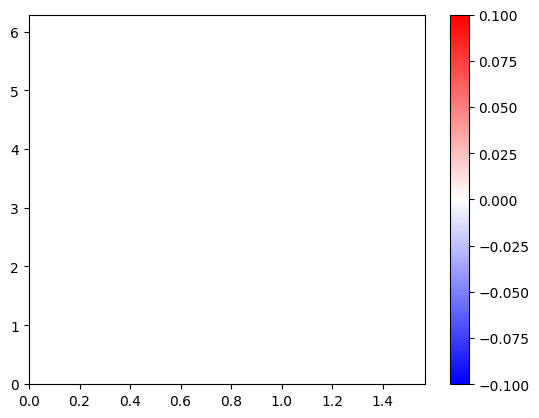

In [193]:
plt.pcolormesh(AL,PHI,D<1,cmap='bwr')
plt.colorbar()

In [144]:
sp.solve(nu,r)[0]

-sqrt(2*\eta**2*sin(phi)*sin(alpha - phi)*cos(alpha + 2*phi)/(\eta**2*sin(alpha)*cos(alpha + 2*phi)**2 + \eta**2*sin(phi)**2*sin(alpha + 2*phi) + 2*\eta**2*sin(phi)*sin(alpha + phi)*cos(alpha + 2*phi) - 2*\eta**2*sin(phi)*sin(alpha + 2*phi)*cos(alpha + phi) - 2*\eta**2*sin(alpha + phi)*cos(alpha + phi)*cos(alpha + 2*phi) + \eta**2*sin(alpha + 2*phi)*cos(alpha + phi)**2 - 2*sin(phi)**2*sin(alpha - 2*phi) + 4*sin(phi)*sin(alpha - 2*phi)*cos(alpha + phi) - 2*sin(alpha - 2*phi)*cos(alpha + phi)**2) - 2*\eta**2*sin(alpha - phi)*cos(alpha + phi)*cos(alpha + 2*phi)/(\eta**2*sin(alpha)*cos(alpha + 2*phi)**2 + \eta**2*sin(phi)**2*sin(alpha + 2*phi) + 2*\eta**2*sin(phi)*sin(alpha + phi)*cos(alpha + 2*phi) - 2*\eta**2*sin(phi)*sin(alpha + 2*phi)*cos(alpha + phi) - 2*\eta**2*sin(alpha + phi)*cos(alpha + phi)*cos(alpha + 2*phi) + \eta**2*sin(alpha + 2*phi)*cos(alpha + phi)**2 - 2*sin(phi)**2*sin(alpha - 2*phi) + 4*sin(phi)*sin(alpha - 2*phi)*cos(alpha + phi) - 2*sin(alpha - 2*phi)*cos(alpha + phi)*

In [140]:
sp.collect(nu, r, evaluate=False)[r**4]

-2*(sin(phi) - cos(alpha + phi))**2*sin(alpha - 2*phi)

In [ ]:
DD

{r_sigma**4: -2*(sin(phi) - cos(alpha + phi))**2*sin(alpha - 2*phi),
 r_sigma**2: -4*\eta**2*(sin(phi) - cos(alpha + phi))*sin(alpha - phi)*cos(alpha + 2*phi),
 1: -2*\eta**4*sin(alpha)*cos(alpha + 2*phi)**2 + \eta**2*(r_sigma**4 + 1)*((sin(phi) - cos(alpha + phi))**2*sin(alpha + 2*phi) + 2*(sin(phi) - cos(alpha + phi))*sin(alpha + phi)*cos(alpha + 2*phi) + sin(alpha)*cos(alpha + 2*phi)**2)}

In [120]:
sp.print_latex(R4)

\eta^{2} \left(\sin{\left(\alpha \right)} \cos^{2}{\left(\alpha + 2 \phi \right)} + \sin^{2}{\left(\phi \right)} \sin{\left(\alpha + 2 \phi \right)} + 2 \sin{\left(\phi \right)} \sin{\left(\alpha + \phi \right)} \cos{\left(\alpha + 2 \phi \right)} - 2 \sin{\left(\phi \right)} \sin{\left(\alpha + 2 \phi \right)} \cos{\left(\alpha + \phi \right)} - 2 \sin{\left(\alpha + \phi \right)} \cos{\left(\alpha + \phi \right)} \cos{\left(\alpha + 2 \phi \right)} + \sin{\left(\alpha + 2 \phi \right)} \cos^{2}{\left(\alpha + \phi \right)}\right) - 2 \sin^{2}{\left(\phi \right)} \sin{\left(\alpha - 2 \phi \right)} + 4 \sin{\left(\phi \right)} \sin{\left(\alpha - 2 \phi \right)} \cos{\left(\alpha + \phi \right)} - 2 \sin{\left(\alpha - 2 \phi \right)} \cos^{2}{\left(\alpha + \phi \right)}


In [73]:
def get_new(alpha,phi):
    return (np.cos(alpha+phi)+np.abs(np.sin(phi)))/(np.cos(alpha+2*phi))

alpha = np.linspace(0,np.pi/2,501)[:-1]
phi = np.linspace(0,np.pi*2,500)
AL,PHI = np.meshgrid(alpha,phi)

new = get_new(AL,PHI)
# plt.pcolormesh(AL,PHI,new,cmap='bwr',vmin=0,vmax=1)
# plt.colorbar()
# plt.show()
new

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.0128331 ,  1.01287374,  1.01291451, ..., -0.59808628,
        -0.33244944, -0.14253353],
       [ 1.02616466,  1.0262481 ,  1.02633181, ..., -0.23021667,
        -0.14254201, -0.06653062],
       ...,
       [ 1.02616466,  1.02608149,  1.0259986 , ...,  1.00043593,
         1.00039634,  1.00035676],
       [ 1.0128331 ,  1.01279258,  1.0127522 , ...,  1.00013863,
         1.00011884,  1.00009906],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

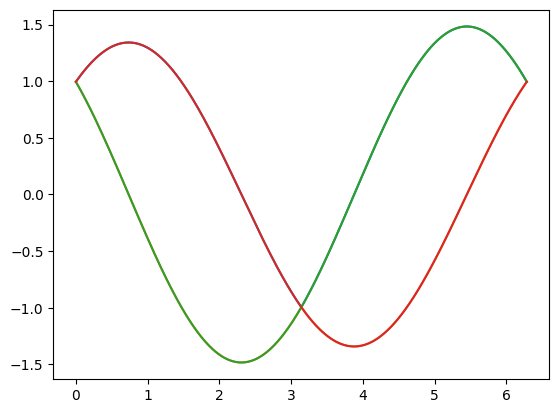

In [80]:
alpha = 0.1
A = np.cos(alpha+phi)+np.abs(np.sin(phi))
B = np.cos(alpha+phi)-np.abs(np.sin(phi))
C = np.cos(alpha+phi)-np.sin(phi)
D = np.cos(alpha+phi)+np.sin(phi)
plt.plot(phi,A)
plt.plot(phi,B)
plt.plot(phi,C)
plt.plot(phi,D)

In [64]:
sp.print_latex(Dphi.subs(mu,mu_sol_p))


\frac{- 2 r_{\sigma}^{2} \left(\eta^{2} \sin{\left(\alpha \right)} + \frac{2 r_{\sigma}^{2} \left(- \cos{\left(\alpha + \phi \right)} + \left|{\sin{\left(\phi \right)}}\right|\right) \sin{\left(\alpha - \phi \right)}}{\cos{\left(\alpha + 2 \phi \right)}} + \frac{r_{\sigma}^{4} \left(- \cos{\left(\alpha + \phi \right)} + \left|{\sin{\left(\phi \right)}}\right|\right)^{2} \sin{\left(\alpha - 2 \phi \right)}}{\eta^{2} \cos^{2}{\left(\alpha + 2 \phi \right)}}\right) + \left(r_{\sigma}^{4} + 1\right) \left(\frac{r_{\sigma}^{2} \left(- \cos{\left(\alpha + \phi \right)} + \left|{\sin{\left(\phi \right)}}\right|\right)^{2} \sin{\left(\alpha + 2 \phi \right)}}{\cos^{2}{\left(\alpha + 2 \phi \right)}} + \frac{2 r_{\sigma}^{2} \left(- \cos{\left(\alpha + \phi \right)} + \left|{\sin{\left(\phi \right)}}\right|\right) \sin{\left(\alpha + \phi \right)}}{\cos{\left(\alpha + 2 \phi \right)}} + r_{\sigma}^{2} \sin{\left(\alpha \right)}\right)}{2 r_{\sigma}^{2}}


In [10]:
dr = sp.Rational(1,2) / r * (1-r**4)* ((1-2*eta1)**2 * r**2 * sp.cos(alpha) + 2 * mu*(1-2*eta1)*(1-2*eta2)*r2*r*sp.cos(alpha+phi) + mu **2 *(1-2*eta2)**2 * r2**2 * sp.cos(alpha + 2*phi))

In [27]:
sp.solve(dphi.subs(r2,1).subs(r,1),mu)[1]

(-2*\eta*sin(phi)*cos(alpha) + sqrt(\eta**4*cos(2*phi)/2 - \eta**4*cos(2*alpha + 2*phi)/2 + \eta**2*cos(2*alpha) - 2*\eta**2*cos(2*phi) + \eta**2 + cos(2*phi)/2 - cos(2*alpha - 2*phi)/2))/(\eta**2*sin(alpha + 2*phi) - sin(alpha - 2*phi))

In [ ]:
print(sp.solve(dphi.subs(r2,1).subs(r,1),mu)[0])

(-2*\eta*sin(phi)*cos(alpha) - sqrt(\eta**4*cos(2*phi)/2 - \eta**4*cos(2*alpha + 2*phi)/2 + \eta**2*cos(2*alpha) - 2*\eta**2*cos(2*phi) + \eta**2 + cos(2*phi)/2 - cos(2*alpha - 2*phi)/2))/(\eta**2*sin(alpha + 2*phi) - sin(alpha - 2*phi))


C:\Users\kim9y\AppData\Local\Temp\ipykernel_35324\76597810.py:2: RuntimeWarning: invalid value encountered in sqrt
  return (-2*eta*np.sin(phi)*np.cos(alpha) + np.sqrt(eta**4*np.cos(2*phi)/2 - eta**4*np.cos(2*alpha + 2*phi)/2 + eta**2*np.cos(2*alpha) - 2*eta**2*np.cos(2*phi) + eta**2 + np.cos(2*phi)/2 - np.cos(2*alpha - 2*phi)/2))/(eta**2*np.sin(alpha + 2*phi) - np.sin(alpha - 2*phi))
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35324\76597810.py:2: RuntimeWarning: invalid value encountered in divide
  return (-2*eta*np.sin(phi)*np.cos(alpha) + np.sqrt(eta**4*np.cos(2*phi)/2 - eta**4*np.cos(2*alpha + 2*phi)/2 + eta**2*np.cos(2*alpha) - 2*eta**2*np.cos(2*phi) + eta**2 + np.cos(2*phi)/2 - np.cos(2*alpha - 2*phi)/2))/(eta**2*np.sin(alpha + 2*phi) - np.sin(alpha - 2*phi))
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35324\76597810.py:4: RuntimeWarning: invalid value encountered in sqrt
  return (-2*eta*np.sin(phi)*np.cos(alpha) - np.sqrt(eta**4*np.cos(2*phi)/2 - eta**4*np.cos(2*alpha + 2*phi

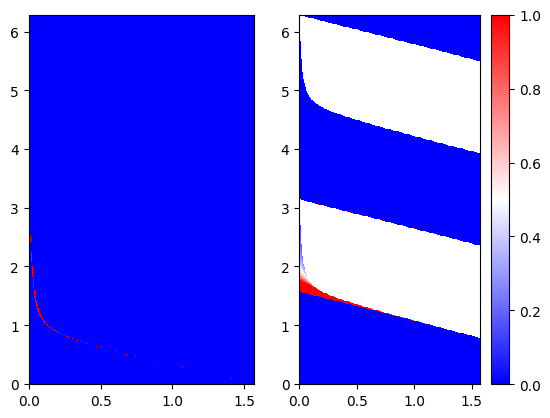

In [48]:
def dphi_mu_minus(alpha,phi,eta = 10):
    return (-2*eta*np.sin(phi)*np.cos(alpha) + np.sqrt(eta**4*np.cos(2*phi)/2 - eta**4*np.cos(2*alpha + 2*phi)/2 + eta**2*np.cos(2*alpha) - 2*eta**2*np.cos(2*phi) + eta**2 + np.cos(2*phi)/2 - np.cos(2*alpha - 2*phi)/2))/(eta**2*np.sin(alpha + 2*phi) - np.sin(alpha - 2*phi))
def dphi_mu_plus(alpha,phi,eta = 10):
    return (-2*eta*np.sin(phi)*np.cos(alpha) - np.sqrt(eta**4*np.cos(2*phi)/2 - eta**4*np.cos(2*alpha + 2*phi)/2 + eta**2*np.cos(2*alpha) - 2*eta**2*np.cos(2*phi) + eta**2 + np.cos(2*phi)/2 - np.cos(2*alpha - 2*phi)/2))/(eta**2*np.sin(alpha + 2*phi) - np.sin(alpha - 2*phi))

def dr_mu_minus(alpha,phi,eta = 10):
    return (-np.cos(alpha + phi) + np.abs(np.sin(phi)))/(eta*np.cos(alpha + 2*phi))

def dr_mu_plus(alpha,phi,eta = 10):
    return -(np.cos(alpha + phi) + np.abs(np.sin(phi)))/(eta*np.cos(alpha + 2*phi))

alpha = np.linspace(0,np.pi/2,501)[:-1]
phi = np.linspace(0,np.pi*2,500)
AL,PHI = np.meshgrid(alpha,phi)

mu_dphi_m = dphi_mu_minus(AL,PHI)
mu_dphi_p = dphi_mu_plus(AL,PHI)

mu_dr_m = dr_mu_minus(AL,PHI)
mu_dr_p = dr_mu_plus(AL,PHI)

plt.subplot(1,2,1)
plt.pcolormesh(AL,PHI,np.abs(mu_dphi_m-mu_dr_p)<1e-2,cmap='bwr')
# plt.pcolormesh(AL,PHI,np.abs(mu_dphi_m-mu_dr_m)<1e-2,cmap='bwr')
plt.subplot(1,2,2)
plt.pcolormesh(AL,PHI,mu_dphi_p,cmap='bwr',vmin=0,vmax=1)
plt.colorbar()
plt.show()

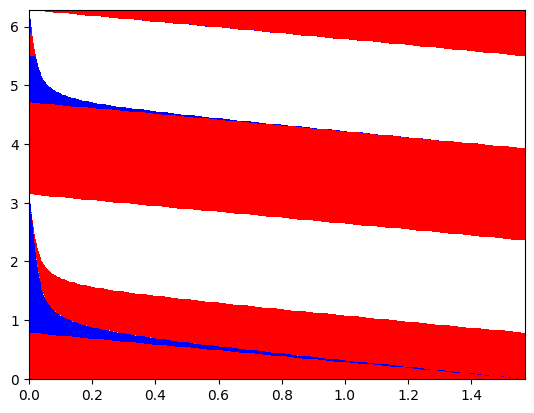

In [49]:
plt.pcolormesh(AL,PHI,(mu_dphi_m-mu_dr_m),cmap='bwr',vmin=-1e-3,vmax=1e-3)
plt.pcolormesh(AL,PHI,(mu_dphi_m-mu_dr_p),cmap='bwr',vmin=-1e-3,vmax=1e-3)



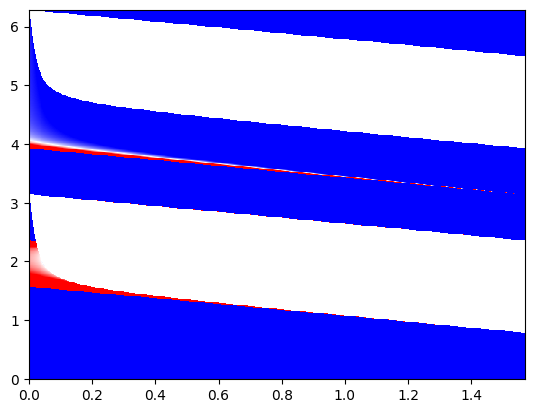

In [52]:
plt.pcolormesh(AL,PHI,(mu_dphi_p-mu_dr_m),cmap='bwr',vmin=0,vmax=1)
# plt.pcolormesh(AL,PHI,(mu_dphi_p-mu_dr_p),cmap='bwr')

In [138]:
B = dr.subs(r2,1)
mu_sol = sp.solve(B,mu)[0].simplify()

In [ ]:

print(dphi.subs(mu,mu_sol).subs(r2,1).subs(r,1).simplify())

(\eta**2*(1 - \eta**2)*sin(alpha)*cos(alpha + 2*phi)**2 + \eta**2*(cos(alpha + phi) - Abs(sin(phi)))**2*sin(alpha + 2*phi) - 4*\eta**2*(cos(alpha + phi) - Abs(sin(phi)))*sin(phi)*cos(alpha)*cos(alpha + 2*phi) - (cos(alpha + phi) - Abs(sin(phi)))**2*sin(alpha - 2*phi))/(\eta**2*cos(alpha + 2*phi)**2)


In [16]:
def get_r_1_line(alpha,phi,eta = 100):
    return (eta**2*(1 - eta**2)*np.sin(alpha)*np.cos(alpha + 2*phi)**2 + eta**2*(np.cos(alpha + phi) - np.abs(np.sin(phi)))**2*np.sin(alpha + 2*phi) - 4*eta**2*(np.cos(alpha + phi) - np.abs(np.sin(phi)))*np.sin(phi)*np.cos(alpha)*np.cos(alpha + 2*phi) - (np.cos(alpha + phi) - np.abs(np.sin(phi)))**2*np.sin(alpha - 2*phi))/(eta**2*np.cos(alpha + 2*phi)**2)



alpha = np.linspace(0,np.pi/2,501)[:-1]
phi = np.linspace(0,np.pi*2,500)
AL,PHI = np.meshgrid(alpha,phi)

mu_real = get_r_1_line(AL,PHI)

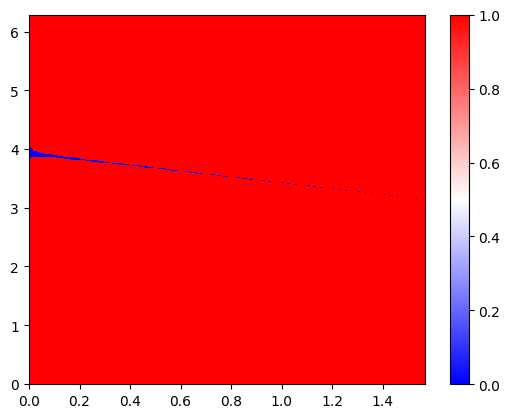

In [17]:
plt.pcolormesh(AL,PHI,mu_real<0,cmap='bwr',vmin=-0,vmax=1)
plt.colorbar()
plt.show()

In [131]:
mu_sol = r/eta*(-sp.cos(alpha+phi)+sp.sqrt(sp.cos(alpha+phi)**2-sp.cos(alpha)*sp.cos(2*phi+alpha)))/sp.cos(2*phi+alpha)

In [132]:
C = dphi.subs(r2,1).simplify()
CC = C.subs(mu,mu_sol).simplify()

In [64]:
CC.expand().collect(r**2) 

-\eta**2*sin(alpha) + r_sigma**4*(sin(alpha)/2 + sin(phi)**2*sin(alpha + 2*phi)/(2*cos(alpha + 2*phi)**2) - sin(alpha + phi)*cos(alpha + phi)/cos(alpha + 2*phi) + sin(alpha + phi)*Abs(sin(phi))/cos(alpha + 2*phi) + sin(alpha + 2*phi)*cos(alpha + phi)**2/(2*cos(alpha + 2*phi)**2) - sin(alpha + 2*phi)*cos(alpha + phi)*Abs(sin(phi))/cos(alpha + 2*phi)**2 - sin(phi)**2*sin(alpha - 2*phi)/(\eta**2*cos(alpha + 2*phi)**2) - sin(alpha - 2*phi)*cos(alpha + phi)**2/(\eta**2*cos(alpha + 2*phi)**2) + 2*sin(alpha - 2*phi)*cos(alpha + phi)*Abs(sin(phi))/(\eta**2*cos(alpha + 2*phi)**2)) + r_sigma**2*(2*sin(alpha - phi)*cos(alpha + phi)/cos(alpha + 2*phi) - 2*sin(alpha - phi)*Abs(sin(phi))/cos(alpha + 2*phi)) + sin(alpha)/2 + sin(phi)**2*sin(alpha + 2*phi)/(2*cos(alpha + 2*phi)**2) - sin(alpha + phi)*cos(alpha + phi)/cos(alpha + 2*phi) + sin(alpha + phi)*Abs(sin(phi))/cos(alpha + 2*phi) + sin(alpha + 2*phi)*cos(alpha + phi)**2/(2*cos(alpha + 2*phi)**2) - sin(alpha + 2*phi)*cos(alpha + phi)*Abs(sin(phi

In [39]:
mu_sol

r_sigma*(-cos(alpha + phi) + Abs(sin(phi)))/(\eta*cos(alpha + 2*phi))

In [29]:
num,de = sp.fraction(C)

In [35]:
sp.solve(sp.expand(num).collect(r),r)

[]

In [12]:
dphi.subs(mu,mu_sol).subs(r2,1).simplify().collect(r)

(-\eta**4*sin(alpha)*cos(alpha + 2*phi)**2 + 2*\eta**2*r_sigma**2*(cos(alpha + phi) + Abs(sin(phi)))*sin(alpha - phi)*cos(alpha + 2*phi) + \eta**2*(r_sigma**4 + 1)*((cos(alpha + phi) + Abs(sin(phi)))**2*sin(alpha + 2*phi) - 2*(cos(alpha + phi) + Abs(sin(phi)))*sin(alpha + phi)*cos(alpha + 2*phi) + sin(alpha)*cos(alpha + 2*phi)**2)/2 - r_sigma**4*(cos(alpha + phi) + Abs(sin(phi)))**2*sin(alpha - 2*phi))/(\eta**2*cos(alpha + 2*phi)**2)

In [84]:
sp.solve(B,r)[1]

\eta*mu*(-cos(alpha + phi) + Abs(sin(phi)))/cos(alpha)

In [67]:
sp.solve(B,mu)[0].simplify()

r_sigma*(-cos(alpha + phi) + Abs(sin(phi)))/(\eta*cos(alpha + 2*phi))

In [ ]:
in_root = sp.cos(alpha+phi)**2 / sp.cos(2*phi + alpha)**2 - sp.cos(alpha)*sp.cos(2*phi + alpha) / sp.cos(2*phi+alpha)**2
in_root.simplify()

(1 - cos(2*phi))/(2*cos(alpha + 2*phi)**2)

In [85]:
def get_r_real(alpha,phi):
    return (-np.cos(alpha+phi)+np.abs(np.sin(phi)))/np.cos(alpha)

In [ ]:
def get_r_real(alpha,phi):
    return (-np.cos(alpha+phi)+np.sqrt(np.cos(alpha+phi)**2-np.cos(alpha)*np.cos(2*phi+alpha)))/np.cos(alpha)

In [86]:

alpha = np.linspace(0,np.pi/2,501)[:-1]
phi = np.linspace(0,np.pi*2,500)
AL,PHI = np.meshgrid(alpha,phi)

mu_real = get_r_real(AL,PHI)

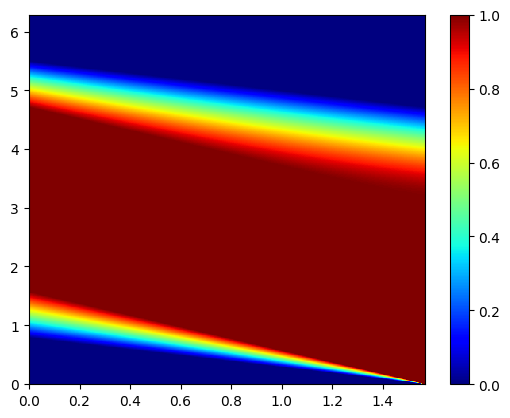

In [87]:
plt.pcolormesh(AL,PHI,mu_real,vmin=0,vmax=1,cmap='jet')
plt.colorbar()

(0.0, 1.0)

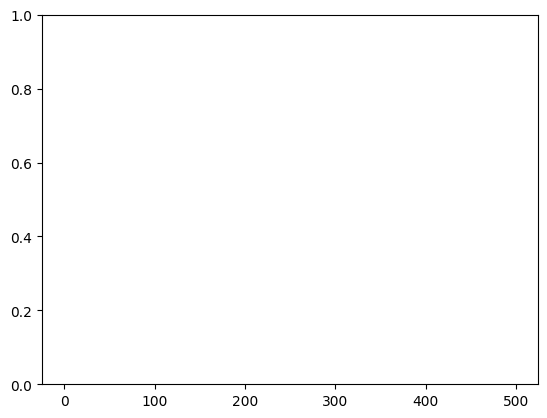

In [ ]:
plt.plot(np.min(mu_real,axis=0))
# plt.ylim(0,1)

(0.0, 1.0)

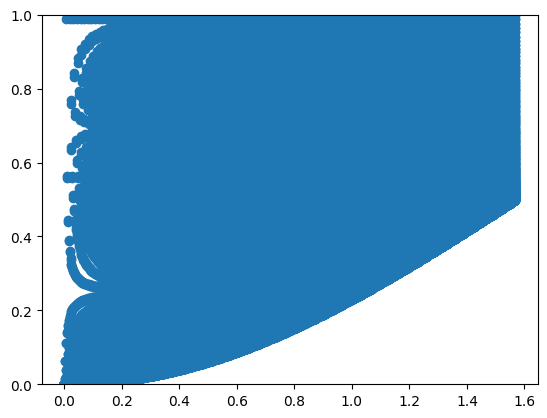

In [35]:
plt.scatter(AL,mu_real)
plt.ylim(0,1)

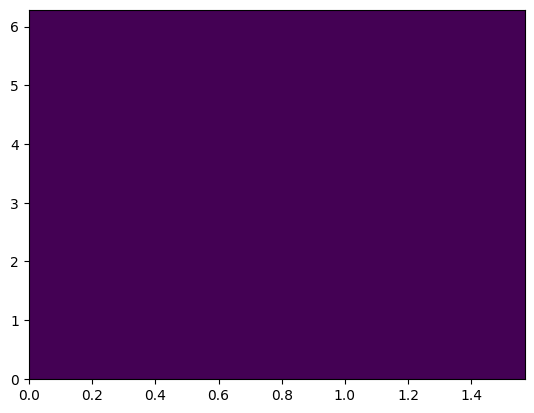

In [27]:
plt.pcolormesh(AL,PHI,mu_real<0)

In [3]:
print(A)

-mu**2*(2*\eta_sigma - 1)**2*sin(alpha - 2*phi) + mu**2*(2*\eta_{\sigma'} - 1)**2*sin(alpha + 2*phi) - 2*mu*(2*\eta_sigma - 1)*(2*\eta_{\sigma'} - 1)*sin(alpha - phi) + 2*mu*(2*\eta_sigma - 1)*(2*\eta_{\sigma'} - 1)*sin(alpha + phi) + (2*\eta_sigma - 1)**2*sin(alpha) - (2*\eta_{\sigma'} - 1)**2*sin(alpha)


In [4]:
def get_A(alpha,phi,mu,eta1 = (0.5 + 0.001),eta2 = (0.5 + 0.1)):
    DD = -mu**2*(2*eta1 - 1)**2*np.sin(alpha - 2*phi) + mu**2*(2*eta2 - 1)**2*np.sin(alpha + 2*phi) - 2*mu*(2*eta1 - 1)*(2*eta2 - 1)*np.sin(alpha - phi) + 2*mu*(2*eta1 - 1)*(2*eta2 - 1)*np.sin(alpha + phi) + (2*eta1 - 1)**2*np.sin(alpha) - (2*eta2 - 1)**2*np.sin(alpha)
    return DD

In [5]:
sp.print_latex(A.collect(mu))

\mu^{2} \left(- \left(2 \eta_{\sigma} - 1\right)^{2} \sin{\left(\alpha - 2 \phi \right)} + \left(2 \eta_{\sigma'} - 1\right)^{2} \sin{\left(\alpha + 2 \phi \right)}\right) + \mu \left(- 2 \left(2 \eta_{\sigma} - 1\right) \left(2 \eta_{\sigma'} - 1\right) \sin{\left(\alpha - \phi \right)} + 2 \left(2 \eta_{\sigma} - 1\right) \left(2 \eta_{\sigma'} - 1\right) \sin{\left(\alpha + \phi \right)}\right) + \left(2 \eta_{\sigma} - 1\right)^{2} \sin{\left(\alpha \right)} - \left(2 \eta_{\sigma'} - 1\right)^{2} \sin{\left(\alpha \right)}


In [6]:
muB = A.collect(mu).coeff(mu)
muA = A.collect(mu).coeff(mu**2)
muC = A.collect(mu).collect(sp.sin(alpha)).coeff(sp.sin(alpha))


In [7]:
alpha = np.linspace(0,np.pi/2,501)[:-1]
phi = np.linspace(0,np.pi*2,500)
AL,PHI = np.meshgrid(alpha,phi)

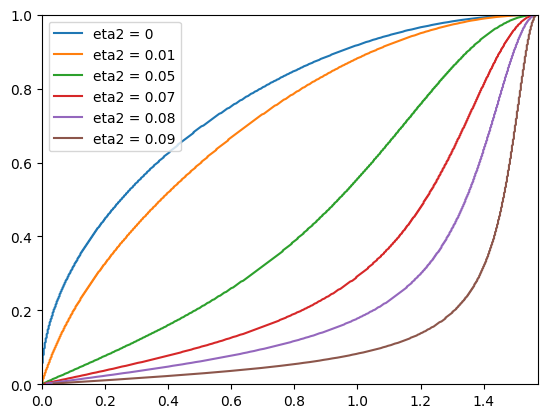

In [9]:

mus =  np.linspace(0,1,501)

ALPHAS = {}
for etas in [0,0.01,0.05,0.07,0.08,0.09]:
    ALPHA = np.zeros(len(mus))
    ALPHAS[etas] = ALPHA
    for i,mu in enumerate(mus):
        try:
            D = get_A(AL,PHI,mu,eta1 = (0.5 + etas),eta2 = (0.5 + 0.1))
            ALPHA[i] = np.unique(AL[D>0]).max()
        except:
            ALPHA[i] = np.nan
    ALPHAS[etas] = ALPHA.copy()

for etas in ALPHAS.keys():
    plt.plot(ALPHAS[etas],mus,label=f'eta2 = {etas}')
plt.xlim(0,np.pi/2)
plt.ylim(0,1)
plt.legend()
plt.show()

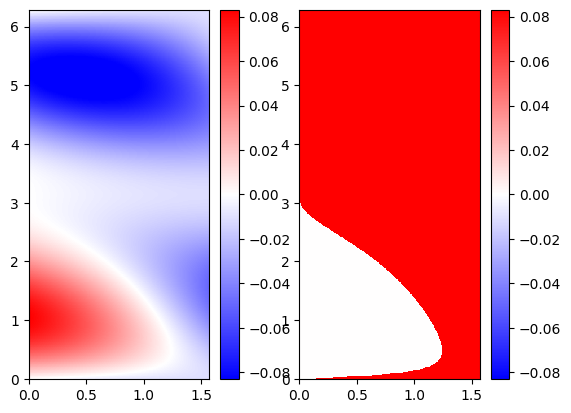

In [125]:
mu = 0.8
D = get_A(AL,PHI,mu,eta1 = (0.5 + 0.05),eta2 = (0.5 + 0.1))
MAXD = np.unique(AL[D>0]).max()
plt.subplot(121)
plt.pcolormesh(AL,PHI,D,cmap='bwr',vmin=-np.max(D),vmax=np.max(D))
plt.colorbar()
plt.subplot(122)

plt.pcolormesh(AL,PHI,D<0,cmap='bwr',vmin=-np.max(D),vmax=np.max(D))
plt.colorbar()
plt.show()

In [30]:
def get_D(alpha,phi,eta1 = (0.5 + 0.001),eta2 = (0.5 + 0.1)):
    BB = -2*(2*eta1 - 1)*(2*eta2 - 1)*np.sin(alpha - phi) + 2*(2*eta1 - 1)*(2*eta2 - 1)*np.sin(alpha + phi)
    AA = -(2*eta1 - 1)**2*np.sin(alpha - 2*phi) + (2*eta2 - 1)**2*np.sin(alpha + 2*phi)
    CC =  (2*eta1 - 1)**2 - (2*eta2 - 1)**2
    return BB**2 - 4*AA*CC



def get_D(alpha,phi,eta1 = (0.5 + 0.001),eta2 = (0.5 + 0.1)):
    BB = -2*(2*eta1 - 1)*(2*eta2 - 1)*np.sin(alpha - phi) + 2*(2*eta1 - 1)*(2*eta2 - 1)*np.sin(alpha + phi)
    AA = -(2*eta1 - 1)**2*np.sin(alpha - 2*phi) + (2*eta2 - 1)**2*np.sin(alpha + 2*phi)
    CC =  (2*eta1 - 1)**2 - (2*eta2 - 1)**2
    D =  BB**2 - 4*AA*CC
    return (-BB + np.sqrt(D))/2*AA


alpha = np.linspace(0,np.pi/2,501)[:-1]
phi = np.linspace(0,np.pi*2,500)
AL,PHI = np.meshgrid(alpha,phi)
D = get_A(AL,PHI)
plt.pcolormesh(AL,PHI,D,cmap='bwr')
plt.colorbar()
plt.show()

TypeError: get_A() missing 1 required positional argument: 'mu'

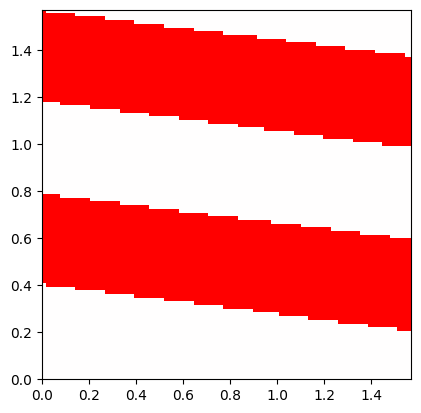

In [21]:
plt.imshow(D<0,extent=[0,np.pi/2,0,np.pi/2],origin='lower',vmin=-1,vmax=1,cmap='bwr')

In [10]:
print(muC)

(2*\eta_sigma - 1)**2 - (2*\eta_{\sigma'} - 1)**2


In [14]:
A.collect(mu)

mu**2*(-(2*\eta_sigma - 1)**2*sin(alpha - 2*phi) + (2*\eta_{\sigma'} - 1)**2*sin(alpha + 2*phi)) + mu*(-2*(2*\eta_sigma - 1)*(2*\eta_{\sigma'} - 1)*sin(alpha - phi) + 2*(2*\eta_sigma - 1)*(2*\eta_{\sigma'} - 1)*sin(alpha + phi)) + (2*\eta_sigma - 1)**2*sin(alpha) - (2*\eta_{\sigma'} - 1)**2*sin(alpha)

In [29]:
sp.simplify(muB**2 -  4*muA*muC)

16*(2*\eta_sigma - 1)**2*(2*\eta_{\sigma'} - 1)**2*sin(phi)**2*cos(alpha)**2 + 4*((2*\eta_sigma - 1)**2*sin(alpha - 2*phi) - (2*\eta_{\sigma'} - 1)**2*sin(alpha + 2*phi))*((2*\eta_sigma - 1)**2 - (2*\eta_{\sigma'} - 1)**2)

In [13]:
muA

-(2*\eta_sigma - 1)**2*sin(alpha - 2*phi) + (2*\eta_{\sigma'} - 1)**2*sin(alpha + 2*phi)

In [5]:
B = sp.solve(A,mu)
B[0]


(2*(2*\eta_sigma - 1)*(2*\eta_{\sigma'} - 1)*sin(phi)*cos(alpha) - 2*sqrt(4*\eta_sigma**4*sin(alpha)**2 - 8*\eta_sigma**4*sin(alpha)*sin(phi)*cos(alpha - phi) - 8*\eta_sigma**3*sin(alpha)**2 + 16*\eta_sigma**3*sin(alpha)*sin(phi)*cos(alpha - phi) - 8*\eta_sigma**2*\eta_{\sigma'}**2*sin(alpha)**2 + 16*\eta_sigma**2*\eta_{\sigma'}**2*sin(phi)**2 + 8*\eta_sigma**2*\eta_{\sigma'}*sin(alpha)**2 - 16*\eta_sigma**2*\eta_{\sigma'}*sin(phi)**2 + 4*\eta_sigma**2*sin(alpha)**2 - 12*\eta_sigma**2*sin(alpha)*sin(phi)*cos(alpha - phi) + 4*\eta_sigma**2*sin(phi)**2 + 8*\eta_sigma*\eta_{\sigma'}**2*sin(alpha)**2 - 16*\eta_sigma*\eta_{\sigma'}**2*sin(phi)**2 - 8*\eta_sigma*\eta_{\sigma'}*sin(alpha)**2 + 16*\eta_sigma*\eta_{\sigma'}*sin(phi)**2 + 4*\eta_sigma*sin(alpha)*sin(phi)*cos(alpha - phi) - 4*\eta_sigma*sin(phi)**2 + 4*\eta_{\sigma'}**4*sin(alpha)**2 + 8*\eta_{\sigma'}**4*sin(alpha)*sin(phi)*cos(alpha + phi) - 8*\eta_{\sigma'}**3*sin(alpha)**2 - 16*\eta_{\sigma'}**3*sin(alpha)*sin(phi)*cos(alpha 

In [162]:
JRR = dr.diff(r)
JRphi = dr.diff(phi)
JphiR = dphi.diff(r)
Jphiphi = dphi.diff(phi)

J = sp.Matrix([[JRR,JRphi],[JphiR,Jphiphi]])
J

Matrix([
[                                                                                                                                                                        -2*r_sigma**2*(mu**2*r_\sigma'**2*(1 - 2*\eta_{\sigma'})**2*cos(alpha + 2*phi) + 2*mu*r_\sigma'*r_sigma*(1 - 2*\eta_sigma)*(1 - 2*\eta_{\sigma'})*cos(alpha + phi) + r_sigma**2*(1 - 2*\eta_sigma)**2*cos(alpha)) + (1 - r_sigma**4)*(2*mu*r_\sigma'*(1 - 2*\eta_sigma)*(1 - 2*\eta_{\sigma'})*cos(alpha + phi) + 2*r_sigma*(1 - 2*\eta_sigma)**2*cos(alpha))/(2*r_sigma) - (1 - r_sigma**4)*(mu**2*r_\sigma'**2*(1 - 2*\eta_{\sigma'})**2*cos(alpha + 2*phi) + 2*mu*r_\sigma'*r_sigma*(1 - 2*\eta_sigma)*(1 - 2*\eta_{\sigma'})*cos(alpha + phi) + r_sigma**2*(1 - 2*\eta_sigma)**2*cos(alpha))/(2*r_sigma**2),                                                                                                                                                                                            (1 - r_sigma**4)*(-2*mu**2*r_\sigma'**2*(1

In [163]:
# J 행렬을 더 단순하게 만들기
J_simplified = J.applyfunc(sp.simplify)
print("단순화된 Jacobian 행렬:")
display(J_simplified)

# 각 요소별로 더 자세한 단순화
print("\n각 요소별 단순화:")
print("J[0,0] (JRR):")
display(J_simplified[0,0])

print("J[0,1] (JRphi):")
display(J_simplified[0,1])

print("J[1,0] (JphiR):")
display(J_simplified[1,0])

print("J[1,1] (Jphiphi):")
display(J_simplified[1,1])

# 행렬식 계산
det_J = J_simplified.det()
print("\n행렬식:")
display(det_J.simplify())

# 고유값 계산 (선택사항)
eigenvals = J_simplified.eigenvals()
print("\n고유값:")
display(eigenvals)


단순화된 Jacobian 행렬:


Matrix([
[                                                                                                                                                                                                             (-4*r_sigma**4*(mu**2*r_\sigma'**2*(2*\eta_{\sigma'} - 1)**2*cos(alpha + 2*phi) + 2*mu*r_\sigma'*r_sigma*(2*\eta_sigma - 1)*(2*\eta_{\sigma'} - 1)*cos(alpha + phi) + r_sigma**2*(2*\eta_sigma - 1)**2*cos(alpha)) - 2*r_sigma*(2*\eta_sigma - 1)*(r_sigma**4 - 1)*(mu*r_\sigma'*(2*\eta_{\sigma'} - 1)*cos(alpha + phi) + r_sigma*(2*\eta_sigma - 1)*cos(alpha)) + (r_sigma**4 - 1)*(mu**2*r_\sigma'**2*(2*\eta_{\sigma'} - 1)**2*cos(alpha + 2*phi) + 2*mu*r_\sigma'*r_sigma*(2*\eta_sigma - 1)*(2*\eta_{\sigma'} - 1)*cos(alpha + phi) + r_sigma**2*(2*\eta_sigma - 1)**2*cos(alpha)))/(2*r_sigma**2),                                                                                                                                                                                  mu*r_\sigma'*(2*\eta_{


각 요소별 단순화:
J[0,0] (JRR):


(-4*r_sigma**4*(mu**2*r_\sigma'**2*(2*\eta_{\sigma'} - 1)**2*cos(alpha + 2*phi) + 2*mu*r_\sigma'*r_sigma*(2*\eta_sigma - 1)*(2*\eta_{\sigma'} - 1)*cos(alpha + phi) + r_sigma**2*(2*\eta_sigma - 1)**2*cos(alpha)) - 2*r_sigma*(2*\eta_sigma - 1)*(r_sigma**4 - 1)*(mu*r_\sigma'*(2*\eta_{\sigma'} - 1)*cos(alpha + phi) + r_sigma*(2*\eta_sigma - 1)*cos(alpha)) + (r_sigma**4 - 1)*(mu**2*r_\sigma'**2*(2*\eta_{\sigma'} - 1)**2*cos(alpha + 2*phi) + 2*mu*r_\sigma'*r_sigma*(2*\eta_sigma - 1)*(2*\eta_{\sigma'} - 1)*cos(alpha + phi) + r_sigma**2*(2*\eta_sigma - 1)**2*cos(alpha)))/(2*r_sigma**2)

J[0,1] (JRphi):


mu*r_\sigma'*(2*\eta_{\sigma'} - 1)*(r_sigma**4 - 1)*(mu*r_\sigma'*(2*\eta_{\sigma'} - 1)*sin(alpha + 2*phi) + r_sigma*(2*\eta_sigma - 1)*sin(alpha + phi))/r_sigma

J[1,0] (JphiR):


(-mu*r_sigma**3*(2*\eta_sigma - 1)*(r_\sigma'**4 + 1)*(mu*r_sigma*(2*\eta_sigma - 1)*sin(alpha - 2*phi) + r_\sigma'*(2*\eta_{\sigma'} - 1)*sin(alpha - phi)) + 2*r_\sigma'**2*r_sigma**4*(mu**2*r_\sigma'**2*(2*\eta_{\sigma'} - 1)**2*sin(alpha + 2*phi) + 2*mu*r_\sigma'*r_sigma*(2*\eta_sigma - 1)*(2*\eta_{\sigma'} - 1)*sin(alpha + phi) + r_sigma**2*(2*\eta_sigma - 1)**2*sin(alpha)) + r_\sigma'**2*r_sigma*(2*\eta_sigma - 1)*(r_sigma**4 + 1)*(mu*r_\sigma'*(2*\eta_{\sigma'} - 1)*sin(alpha + phi) + r_sigma*(2*\eta_sigma - 1)*sin(alpha)) - r_\sigma'**2*(r_sigma**4 + 1)*(mu**2*r_\sigma'**2*(2*\eta_{\sigma'} - 1)**2*sin(alpha + 2*phi) + 2*mu*r_\sigma'*r_sigma*(2*\eta_sigma - 1)*(2*\eta_{\sigma'} - 1)*sin(alpha + phi) + r_sigma**2*(2*\eta_sigma - 1)**2*sin(alpha)))/(r_\sigma'**2*r_sigma**3)

J[1,1] (Jphiphi):


mu*(r_\sigma'**3*(2*\eta_{\sigma'} - 1)*(r_sigma**4 + 1)*(mu*r_\sigma'*(2*\eta_{\sigma'} - 1)*cos(alpha + 2*phi) + r_sigma*(2*\eta_sigma - 1)*cos(alpha + phi)) + r_sigma**3*(2*\eta_sigma - 1)*(r_\sigma'**4 + 1)*(mu*r_sigma*(2*\eta_sigma - 1)*cos(alpha - 2*phi) + r_\sigma'*(2*\eta_{\sigma'} - 1)*cos(alpha - phi)))/(r_\sigma'**2*r_sigma**2)


행렬식:


KeyboardInterrupt: 

In [117]:
dr_1 = sp.simplify(dr.subs(r2,1))

\dot{r_\sigma} ={}& \frac{1}{2r_\sigma}\left(1-r_\sigma^4\right) \Biggl( \left(1-2\eta_\sigma\right)^2r_\sigma^2\cos{\alpha} \\
    & + 2\mu\left(1-2\eta_\sigma\right)\left(1-2\eta_{\sigma^\prime}\right)r_\sigma r_{\sigma^\prime}\cos{\left(\phi+\alpha\right)} \\
    & + \mu^2\left(1-2\eta_{\sigma^\prime}\right)^2r_{\sigma^\prime}^2\cos{\left(2\phi+\alpha\right)} \Biggr),

In [129]:
# dr_1에서 괄호 안에 있는 부분만 따로 분리하려면, dr_1의 인자를 확인하고, .args를 활용하거나, .as_coeff_Mul(), .as_coeff_Add() 등을 사용할 수 있습니다.
# 예를 들어, dr_1이 다음과 같이 생겼다면:
# dr_1 = a * (b + c + d)
# 이때 괄호 안에 있는 b + c + d만 분리하고 싶으면 아래와 같이 할 수 있습니다.

# dr_1의 인자(곱셈 구조) 확인
dr_1_factors = dr_1.as_coeff_Mul()
# dr_1_factors[1]이 괄호 안에 있는 식이 될 가능성이 높음

# 또는, dr_1이 Add 구조라면 .args로 분해
# print(dr_1.args)

# 실제로 괄호 안에 있는 부분만 추출
dr_1.args[-1]



mu**2*(2*\eta_{\sigma'} - 1)**2*cos(alpha + 2*phi) + 2*mu*r_sigma*(2*\eta_sigma - 1)*(2*\eta_{\sigma'} - 1)*cos(alpha + phi) + r_sigma**2*(2*\eta_sigma - 1)**2*cos(alpha)

In [138]:
dr_1.args[-1].args

(mu**2*(2*\eta_{\sigma'} - 1)**2*cos(alpha + 2*phi),
 r_sigma**2*(2*\eta_sigma - 1)**2*cos(alpha),
 2*mu*r_sigma*(2*\eta_sigma - 1)*(2*\eta_{\sigma'} - 1)*cos(alpha + phi))

In [ ]:
C = mu**2*(2*eta2 - 1)**2*sp.cos(alpha + 2*phi)
A = (2*eta1 - 1)**2*sp.cos(alpha)
B =  mu*(2*eta1 - 1)*(2*eta2  - 1)*sp.cos(alpha + phi)


In [155]:
sp.print_latex(sp.simplify(B**2 - A*C).args[-1].trigsimp())

- \frac{\cos{\left(2 \phi \right)}}{2} + \frac{3 \cos{\left(2 \left(\alpha + \phi\right) \right)}}{2} + 2


In [151]:
def check_graph(phi,alpha):
    return 4 - np.cos(2*phi) + 3*np.cos(2*(alpha+phi))


alpha=1.5707963267948966에서 음수 또는 0이 되는 phi가 존재합니다.


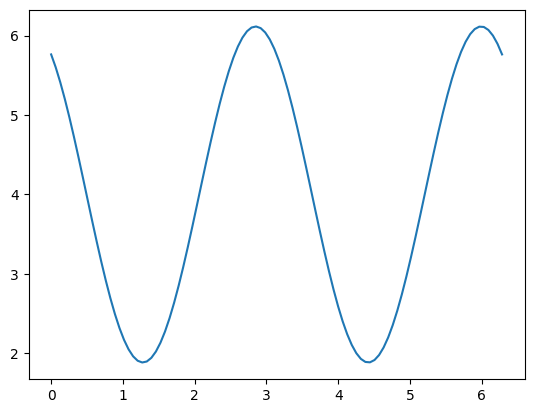

In [156]:
# alpha가 0 ~ pi/2 범위에서, check_graph(phi, alpha)가 항상 양수임을 수치적으로 확인해보자.
alphas = np.linspace(0, np.pi/2, 100)
phis = np.linspace(0, 2*np.pi, 200)
is_positive = True

for a in alphas:
    values = check_graph(phis, a)
    if np.any(values <= 0):
        print(f"alpha={a}에서 음수 또는 0이 되는 phi가 존재합니다.")
        is_positive = False
        break

if is_positive:
    print("모든 alpha ∈ [0, pi/2]에 대해 check_graph(phi, alpha)는 모든 phi에서 항상 양수입니다.")

phi =  np.linspace(0,2*np.pi,100)
plt.plot(phi,check_graph(phi,alpha))

In [121]:
sp.solve(dr_1,r)[1]

mu*(-2*\eta_{\sigma'}*cos(alpha + phi) - 2*\eta_{\sigma'}*Abs(sin(phi)) + cos(alpha + phi) + Abs(sin(phi)))/((2*\eta_sigma - 1)*cos(alpha))

In [110]:
A = ( 2 * mu*(1-2*eta1)*(1-2*eta2)*r2*r*sp.cos(alpha+phi) + mu **2 *(1-2*eta2)**2 * r2**2 * sp.cos(alpha + 2*phi)).subs(r2,1)
SUB = sp.solve(A,r)[0].trigsimp()

In [107]:
dpsi1 = - sp.Rational(1,2) *1/r**2 * (1+r**4)*(0 * r**2  * sp.sin(alpha) + 2 * mu*(1-2*eta1)*(1-2*eta2)*r2*r*sp.sin(alpha+phi) + mu **2 *(1-2*eta2)**2 * r2**2 * sp.sin(alpha+2*phi))
dpsi2 = - sp.Rational(1,2) *1/r2**2 * (1+r2**4)*((1-2*eta2)**2 * r2**2  * sp.sin(alpha) + 2 * mu*(1-2*eta1)*(1-2*eta2)*r2*r*sp.sin(alpha-phi) + mu **2 *0 * r**2 * sp.sin(alpha-2*phi))
dphi = dpsi2 - dpsi1


In [113]:
BB = dphi.subs(r2,1).subs(r,SUB).simplify()

In [115]:
BB

mu**4*(2*\eta_{\sigma'} - 1)**4*sin(phi)*cos(alpha + 2*phi)**2/(8*(2*\eta_sigma - 1)**2*cos(alpha + phi)**3) + mu**2*(2*\eta_{\sigma'} - 1)**2*sin(alpha - phi)*cos(alpha + 2*phi)/cos(alpha + phi) + 2*(2*\eta_sigma - 1)**2*sin(phi)*cos(alpha + phi)/cos(alpha + 2*phi)**2 - (2*\eta_{\sigma'} - 1)**2*sin(alpha)

In [114]:
sp.solve(BB,phi)

KeyboardInterrupt: 

In [ ]:
eta1,eta2,r,phi,alpha,beta = sp.symbols('eta1 eta2 r phi alpha beta',real=True)
beta_rp = eta2*r/(eta1*sp.cos(alpha+2*phi))*(-sp.cos(alpha+phi)+sp.sqrt(sp.cos(alpha+phi)**2-sp.cos(alpha)*sp.cos(alpha+2*phi)))
beta_rm = eta2*r/(eta1*sp.cos(alpha+2*phi))*(-sp.cos(alpha+phi)-sp.sqrt(sp.cos(alpha+phi)**2-sp.cos(alpha)*sp.cos(alpha+2*phi)))

dr = sp.Rational(1,2) *1/ r * (1-r**4)*(eta2**2 * r**2 * sp.cos(alpha) + 2 * beta*eta1*eta2*r*sp.cos(alpha+phi) + beta **2 *eta1**2 * sp.cos(alpha + 2*phi))
dpsi2 = - sp.Rational(1,2) *1/r**2 * (1+r**4)*(eta2**2 * r**2 * sp.sin(alpha) + 2 * beta*eta1*eta2*r*sp.sin(alpha+phi) + beta**2 * eta1**2 * sp.sin(alpha+2*phi))
dpsi1 = - sp.Rational(1,2) * (2)*(eta1**2 *sp.sin(alpha) + 2 * beta*eta1*eta2*r *sp.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * sp.sin(alpha-2*phi))
dphi = dpsi2 - dpsi1
sol_rs =  sp.solve(dr,r)

In [ ]:
eq = mu**2 * sp.sin(2*phi + alpha) - sp.sin(alpha)
dr = sp.Rational(1,2) / r *(1-r**4) * (mu**2*(1-2*eta2)**2 * sp.cos(2*phi + alpha))
dphi = -sp.Rational(1,2) / r**2 *(1+r**4) * (mu**2*(1-2*eta2)**2 * sp.sin(2*phi + alpha)) + ((1-2*eta2)**2 * sp.sin(alpha))
JRR = dr.diff(r)
JRphi = dr.diff(phi)
JphiR = dphi.diff(r)
Jphiphi = dphi.diff(phi)

J = sp.Matrix([[JRR,JRphi],[JphiR,Jphiphi]])
J